<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/MDR_FULLDATASET_submitted_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the data
from google.colab import files
uploaded = files.upload()
np.random.seed(0)


Saving MUST_MDR_DATA_final_MERGED.csv to MUST_MDR_DATA_final_MERGED (1).csv


In [4]:
data = pd.read_csv("MUST_MDR_DATA_final_MERGED.csv", encoding='latin-1',low_memory=False)
#data = pd.read_csv("MUST_MDR_DATA_final.csv", encoding='latin-1',low_memory=False)
data.head()

,Identification number,Specimen number,Organism,Country,Laboratory,Origin,Last name,First name,Sex,Date of Birth,...,DOX_ND30,LNZ_ND30,MEM_ND10,MET_ND5,PIP_ND100,CCV_ND30,NOV_ND5,FOX_ND10,PEF_ND10,NOR_ND5
0,O-0179,NaN,NaN,UGA,DMM,h,KABIKIIRA,FLORENCE,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O-0180,NaN,NaN,UGA,DMM,h,TUMUHIMBISE,DEUS,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O-0181,NaN,NaN,UGA,DMM,h,KYAHANGIRWE,BETETH,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,O-0182,NaN,NaN,UGA,DMM,h,LUBEGA,SAMUEL,m,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,O-0170,NaN,NaN,UGA,DMM,h,NAKUNDA,ANNITAH,f,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data.columns)

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth', 'Age', 'Age category', 'Location', 'Institution',
       'Department', 'Location type', 'Date of admission', 'Specimen date',
       'Specimen type', 'Specimen type (Numeric)', 'Reason', 'Isolate number',
       'Organism type', 'Serotype', 'Date of data entry',
       'Hospitalised for more than 48hrs at specimen collection time',
       'Patient transferred from another facility?',
       'Prior antibiotic therapy', 'AMX_ND25', 'AMC_ND20', 'AMK_ND30',
       'AMP_ND10', 'AZM_ND15', 'FEP_ND30', 'BAC_ND10', 'CRO_ND30', 'CXM_ND30',
       'CIP_ND5', 'OXA_ND1', 'CHL_ND30', 'CZO_ND30', 'CLI_ND2', 'GEN_ND10',
       'GEH_ND120', 'ERY_ND15', 'TCY_ND30', 'RIF_ND5', 'SAM_ND10', 'OFX_ND5',
       'SXT_ND12', 'TOB_ND10', 'OPT_ND5', 'MFX_ND5', 'VAN_ND30', 'PEN_ND10',
       'NAL_ND30', 'IPM_ND10', 'CAC_ND30', 'LVX_ND5', 'NIT_ND300', 'C

In [6]:
print(data['Organism'].unique())

[nan 'spn' 'xxx' 'eco' 'kl-' 'sau' 'mor' 'pr-' 'ps-' 'en-' 'sgc' 'can'
 'ent' 'str' 'sal' 'ci-' 'ac-' 'eae' 'con' 'sta' 'sat' 'kpn' 'cdi' 'spy'
 'eag' 'afs' 'pae' 'xsg' 'xpa' 'scn' 'esc' 'cal' 'efa' 'gm-' 'pmi' 'fun'
 'shi' 'prv' 'cfr' 'afl' 'pen' 'kox' 'yea' 'aba' 'acr' 'ngo' 'ani' 'mmo'
 'tn' 'nas' 'ecl' 'gnr' 'sc+' 'kl' 'sgm' 'koz' '157' 'nfr' 'cne' 'cdp'
 'nor' 'bsa' 'pvu' 'bsl' 'ne-' 'hhe' 'sma' 'oth' 'xx' 'afb' 'sai' 'caj'
 'cmv' 'asp' 'cry' 'ha-' 'XXX' 'cdt' 'sep' 'bl' 'ssa' 'xsa' 'svi' 'aan'
 'pma' 'xgo' 'cac' 'cwe' 'spl' 'ecx' 'sfi' 'kas' 'cpa' 'cgu' 'alw' 'cle'
 'efm' 'cci' 'ecc']


In [7]:
import pandas as pd

# Replacement dictionary for organism abbreviations
organism_replacements = {
    'nfr': 'Neisseria meningitidis',
    'spn': 'Streptococcus species', #pneumoniae'
    'eco': 'Escherichia coli',
    'kl-': 'Klebsiella species',
    'sau': 'Staphylococcus aureus',
    'mor': 'Moraxella catarrhalis',
    'pr-': 'Providencia species',
    'ps-': 'Pseudomonas species',
    'en-': 'Enterobacter species',
    'sgc': 'Serratia species',
    'can': 'Candida species',
    'ent': 'Enterococcus species',
    'str': 'Streptococcus species',
    'sal': 'Salmonella species',
    'ci-': 'Citrobacter species',
    'ac-': 'Acinetobacter species',
    'eae': 'Escherichia coli',#Enteroaggregative Escherichia coli
    'con': 'Clostridium species',
    'sta': 'Staphylococcus aureus',
    'sat': 'Sarcina species',
    'kpn': 'Klebsiella species',#Klebsiella pneumoniae
    'cdi': 'Clostridium difficile',
    'spy': 'Streptococcus species',#pyogenes
    'eag': 'Escherichia coli',#(enteropathogenic)
    'afs': 'Aspergillus species',
    'pae': 'Pseudomonas species',#aeruginosa
    'xsg': 'Xanthomonas species',
    'xpa': 'Xanthomonas phaseoli',
    'scn': 'Streptococcus species',#Streptococcus mitis
    'esc': 'Escherichia coli',#(enterotoxigenic)
    'cal': 'Candida species',#albicans',
    'efa': 'Enterococcus species',#faecalis',
    'gm-': 'Gram-negative bacteria',
    'pmi': 'Pseudomonas species',#mallei',
    'fun': 'Fungal species',
    'shi': 'Shigella species',
    'prv': 'Providencia species',#vulgaris',
    'cfr': 'Corynebacterium species',
    'afl': 'Aspergillus flavus',
    'pen': 'Penicillium species',
    'kox': 'Klebsiella species', #Klebsiella oxytoca
    'yea': 'Yeast',
    'aba': 'Acinetobacter species',#Acinetobacter baumannii
    'acr': 'Acinetobacter species',
    'ngo': 'Neisseria gonorrhoeae',
    'ani': 'Anisakis species',
    'mmo': 'Mycobacterium marinum',
    'tn': 'Treponema species',
    'nas': 'Nasal flora',
    'ecl': 'Escherichia coli',#(enterohemorrhagic)
    'gnr': 'Gram-negative rods',
    'sc+': 'Streptococcus species',#Streptococcus agalactiae',
    'kl': 'Klebsiella species',
    'sgm': 'Streptococcus species',#Streptococcus gallolyticus',
    'koz': 'Kocuria species',
    '157': 'Escherichia coli',#O157:H7
    'cne': 'Citrobacter nepaulensis',
    'cdp': 'Campylobacter species',
    'nor': 'Norovirus',
    'bsa': 'Bacillus subtilis',
    'pvu': 'Pseudomonas vulgaris',
    'bsl': 'Bacillus cereus',
    'ne-': 'Neisseria species',
    'hhe': 'Haemophilus influenzae',
    'sma': 'Streptococcus species',#Streptococcus mitis
    'oth': 'Other pathogens',
    'xx': 'Unknown organism',
    'xxx': 'Unknown organism',
    'afb': 'Acinetobacter species',
    'sai': 'Salmonella infantis',
    'caj': 'Corynebacterium jeikeium',
    'cmv': 'Cytomegalovirus',
    'asp': 'Aspergillus species',
    'cry': 'Cryptococcus neoformans',
    'ha-': 'Helicobacter species',
    'XXX': 'Unknown organism',
    'cdt': 'Corynebacterium diphtheriae',
    'sep': 'Sepsis',
    'bl': 'Brucella species',
    'ssa': 'Streptococcus species',#'Streptococcus salivarius'
    # Add any additional organisms as needed
    'xsa': 'Xanthomonas species',
    'svi': 'Streptococcus viridans',
    'aan': 'Anaerobic species',
    'pma': 'Proteus mirabilis',
    'xgo': 'Xanthomonas campestris pv. glycines',
    'cac': 'Clostridium acetobutylicum',
    'cwe': 'Clostridium perfringens',
    'spl': 'Sphingomonas species',
    'ecx': 'Escherichia coli',#(extraintestinal pathogenic strain)
    'sfi': 'Shigella flexneri',
    'kas': 'Klebsiella aerogenes',
    'cpa': 'Clostridium perfringens alpha toxin',
    'cgu': 'Corynebacterium glutamicum',
    'alw': 'Alcaligenes faecalis',
    'cle': 'Clostridium leptum',
    'efm': 'Enterococcus faecium',
    'cci': 'Clostridium citroniae',
    'ecc': 'Escherichia coli', #complex
}
#update organisms
data['Organism'] = data['Organism'].replace(organism_replacements)


In [8]:
#print unique organisms
print(data['Organism'].unique())
# Get the total number of unique organisms
num_unique_organisms = data['Organism'].nunique()

# Print the total number
print("Total number of unique organisms:", num_unique_organisms)

[nan 'Streptococcus species' 'Unknown organism' 'Escherichia coli'
 'Klebsiella species' 'Staphylococcus aureus' 'Moraxella catarrhalis'
 'Providencia species' 'Pseudomonas species' 'Enterobacter species'
 'Serratia species' 'Candida species' 'Enterococcus species'
 'Salmonella species' 'Citrobacter species' 'Acinetobacter species'
 'Clostridium species' 'Sarcina species' 'Clostridium difficile'
 'Aspergillus species' 'Xanthomonas species' 'Xanthomonas phaseoli'
 'Gram-negative bacteria' 'Fungal species' 'Shigella species'
 'Corynebacterium species' 'Aspergillus flavus' 'Penicillium species'
 'Yeast' 'Neisseria gonorrhoeae' 'Anisakis species'
 'Mycobacterium marinum' 'Treponema species' 'Nasal flora'
 'Gram-negative rods' 'Kocuria species' 'Neisseria meningitidis'
 'Citrobacter nepaulensis' 'Campylobacter species' 'Norovirus'
 'Bacillus subtilis' 'Pseudomonas vulgaris' 'Bacillus cereus'
 'Neisseria species' 'Haemophilus influenzae' 'Other pathogens'
 'Salmonella infantis' 'Corynebacter

In [9]:
specimen_type_replacements = {
    # Existing mappings (partial for clarity)
    'ka': 'Joint Aspirate',  # 'Knee Aspirate'
    'kf': 'Joint Aspirate',  # 'Knee Fluid'
    'us': 'Ultrasound-Guided Sample',  # Short form of ultrasound-guided specimen
    # Full forms
    'Urine': 'Urine',
    'urine': 'Urine',
    'ur': 'Urine',
    'uc': 'Urine',
    'ur.': 'Urine',
    'ùr': 'Urine',
    'cy': 'Urine',
    're': 'Urine',

    'Pus Swab': 'Pus Swab',
    'pus swab': 'Pus Swab',
    'ps': 'Pus Swab',
    'pu': 'Pus Swab',
    'PUS': 'Pus Swab',
    'pa': 'Pus Swab',
    'Pus': 'Pus Swab',

    'HVS': 'HVS',
    'hvs': 'HVS',
    'vaginal swab': 'HVS',
    'va': 'HVS',
    'V/S': 'HVS',

    'Sputum': 'Sputum',
    'sputum': 'Sputum',
    'sp': 'Sputum',
    'sm': 'Sputum',
    'ln': 'Sputum',
    'sl': 'Sputum',
    'lu': 'Sputum',
    'ex': 'Sputum',
    'LUNG ABCES': 'Sputum',
    'pl': 'Pleural Fluid',

    'Stool': 'Stool',
    'stool': 'Stool',
    'st': 'Stool',
    'S/F': 'Stool',
    'sf': 'Stool',

    'Wound Swab': 'Wound Swab',
    'wound swab': 'Wound Swab',
    'wd': 'Wound Swab',
    'sw': 'Wound Swab',
    'sk': 'Wound Swab',
    'mo': 'Wound Swab',
    'W/S': 'Wound Swab',
    'ws': 'Wound Swab',

    'Throat Swab': 'Throat Swab',
    'throat swab': 'Throat Swab',
    'th': 'Throat Swab',
    'T/S': 'Throat Swab',

    'Pleural Fluid': 'Pleural Fluid',
    'pleural fluid': 'Pleural Fluid',
    'Pleural fluid/aspirate': 'Pleural Fluid',
    'Pleural aspirate': 'Pleural Fluid',
    'pf': 'Pleural Fluid',
    'fn': 'Pleural Fluid',

    'Ear Swab': 'Ear Swab',
    'ear swab': 'Ear Swab',
    'E/S': 'Ear Swab',
    'ea': 'Ear Swab',
    'en': 'Ear Swab',

    'Blood Culture': 'Blood Culture',
    'blood culture': 'Blood Culture',
    'blood': 'Blood Culture',
    'bl': 'Blood Culture',
    'B/S': 'Blood Culture',
    'bo': 'Blood Culture',
    'cv': 'Blood Culture',
    'sb': 'Blood Culture',

    # Other mappings
    'ab': 'Abdominal Fluid',
    'fl': 'Fluid (Unspecified)',
    'de': 'Debridement Sample',
    'bx': 'Biopsy',
    'lx': 'Lymph Node Biopsy',
    'pt': 'Peritoneal Tap',
    'pl': 'Pleural Fluid',
    'cs': 'CSF',
    'csf': 'CSF',
    'C/S': 'CSF',
    'ce': 'CSF',

    # Newly added mappings
    'Penile pestula': 'Penile Fistula Sample',
    'penile pestula': 'Penile Fistula Sample',
    'si': 'Small Intestine Fluid',
    'ng tube': 'Nasogastric Tube Aspirate',
    'um': 'Unknown',
    'te': 'Testicular Fluid',
    'gn': 'Genital Sample',
    'ti': 'Tissue Sample',
    'ut': 'Uterine Tissue',
    'end': 'Endometrial Tissue',
    'bs': 'Body Surface Swab',
    'br': 'Bronchial Fluid',
    'Chest Fluid': 'Chest Fluid',
    'ch': 'Chest Fluid',
    'fl': 'Fluid (Unspecified)',
    'Bone Biopsy': 'Bone Biopsy',
    'bn': 'Bone Biopsy',
    'Bone Marrow': 'Bone Marrow',
    'bm': 'Bone Marrow',
    'pm': 'Post-Mortem Sample',
    'Synovial Aspirate': 'Synovial Aspirate',
    'sa': 'Synovial Aspirate',
    'ha': 'Hemarthrosis Fluid',
    'tracheal': 'Tracheal Aspirate',
    'tracheal swab': 'Tracheal Aspirate',
    'ca': 'Cervical Aspirate',  # New addition
    # New mappings for abbreviations
    'pd': 'Peritoneal Dialysis',
    'ta': 'Tracheal Aspirate',
    'ue': 'Urine',
    'rp': 'Retroperitoneal Fluid',
    'sv': 'Seminal Vesicle Fluid',
    'hp': 'Hepatic Fluid',
    'no': 'Naso pharyngeal swab',
    'ga': 'Joint Aspirate',
    'pg': 'Pleural Gland Fluid',
    'cx': 'Cervical Swab',
    'ey': 'Eye Swab',
    'eo': 'External Otitis Swab',
    'as': 'Ascitic fluid',
    'u/s': 'Ultrasound-Guided Sample',
    'knee': 'Joint Aspirate',
    'bt': 'Biopsy Tissue',
    'mi': 'Myocardial Infarct Tissue',
    'ha': 'Hemarthrosis Fluid',
    'de': 'Debridement Sample',
    'jf': 'Joint Aspirate',
    'kn': 'Joint Aspirate',
    'cr': 'Catheter Residue',
    'bld': 'Blood Sample',
    'bi': 'Blood Culture',
    'eh': 'Exudate from Hernia',
    'ec': 'Endocervical Sample',
    'tr': 'Tracheal Aspirate',
    'pe': 'Pericardial Effusion Fluid',
    'ft': 'Foot Tissue',
    'la': 'Lymph Aspirate',
    'nl': 'Nasal Lavage',
    'ul': 'Ulcer Sample',
    'ett': 'Endotracheal Tube Sample',
    'ot': 'Otitis Sample',
    'di': 'Diagnostic Sample',
    'ov': 'Ovarian Fluid',
    'msu': 'Midstream Urine Sample',
    'sc': 'Skin Sample',
    'slide s': 'Microscopy Slide',
    'trasectomy': 'Trachectomy Sample',
    'cc': 'Cervical Cytology Sample',
    'ett tip': 'Endotracheal Tube Tip Sample',
    'ecs': 'Endometrial Cytology Sample',
    'ettp': 'Endotracheal Tube Sample (Post-Procedure)',
    'li': 'Liver Tissue Sample',
    'at': 'Ascitic fluid'

}

# Assuming 'data' is your pandas DataFrame with the 'Organism' column
data['Specimen type'] = data['Specimen type'].replace(specimen_type_replacements)

In [10]:
#print unique specimen types
print(data['Specimen type'].unique())

['Urine' 'Pus Swab' 'HVS' 'Sputum' 'Stool' 'Wound Swab' 'Throat Swab'
 'Pleural Fluid' 'Ear Swab' 'Blood Culture' 'Abdominal Fluid'
 'Peritoneal Dialysis' 'Tracheal Aspirate' nan 'Fluid (Unspecified)'
 'Bone Biopsy' 'Ascitic fluid' 'CSF' 'Retroperitoneal Fluid'
 'Seminal Vesicle Fluid' 'Hepatic Fluid' 'Naso pharyngeal swab'
 'Joint Aspirate' 'Small Intestine Fluid' 'Penile Fistula Sample'
 'Cervical Swab' 'Pleural Gland Fluid' 'Cervical Aspirate' 'Chest Fluid'
 'Eye Swab' 'External Otitis Swab' 'Uterine Tissue' 'Endometrial Tissue'
 'Ultrasound-Guided Sample' 'Tissue Sample' 'Biopsy Tissue'
 'Post-Mortem Sample' 'Myocardial Infarct Tissue' 'Bone Marrow'
 'Synovial Aspirate' 'Hemarthrosis Fluid' 'Debridement Sample' 'Biopsy'
 'Lymph Node Biopsy' 'Peritoneal Tap' 'Nasogastric Tube Aspirate'
 'Catheter Residue' 'Blood Sample' 'Exudate from Hernia'
 'Endocervical Sample' 'Body Surface Swab' 'Bronchial Fluid' 'Unknown'
 'Pericardial Effusion Fluid' 'Foot Tissue' 'Lymph Aspirate'
 'Nasal Lav

In [11]:
#print unique organism type
print(data['Organism type'].unique())



[nan '+' 'o' '-' 'f']


In [12]:
# Define the column name replacements
column_name_mapping = {

    'AMX_ND25': 'Amoxicillin',
    'AMC_ND20': 'Amoxicillin/Clavulanic Acid',
    'AMK_ND30': 'Amikacin',
    'AMP_ND10': 'Ampicillin',
    'AZM_ND15': 'Azithromycin',
    'FEP_ND30': 'Cefepime',
    'BAC_ND10': 'Bacitracin',
    'CRO_ND30': 'Ceftriaxone',
    'CXM_ND30': 'Cefuroxime',
    'CIP_ND5': 'Ciprofloxacin',
    'OXA_ND1': 'Oxacillin',
    'CHL_ND30': 'Chloramphenicol',
    'CZO_ND30': 'Cefazolin',
    'CLI_ND2': 'Clindamycin',
    'GEN_ND10': 'Gentamicin',
    'GEH_ND120': 'Gentaheptose',
    'ERY_ND15': 'Erythromycin',
    'TCY_ND30': 'Tetracycline',
    'RIF_ND5': 'Rifampicin',
    'SAM_ND10': 'Ampicillin/Sulbactam',
    'OFX_ND5': 'Ofloxacin',
    'SXT_ND12': 'Sulfamethoxazole',  # corrected spelling
    'TOB_ND10': 'Tobramycin',
    'OPT_ND5': 'Optochin',
    'MFX_ND5': 'Moxifloxacin',
    'VAN_ND30': 'Vancomycin',
    'PEN_ND10': 'Penicillin',
    'NAL_ND30': 'Nalidixic Acid',
    'IPM_ND10': 'Imipenem',
    'CAC_ND30': 'Cefaclor',
    'CAZ_ND30': 'Ceftazidime',
    'LVX_ND5': 'Levofloxacin',
    'NIT_ND300': 'Nitrofurantoin',
    'CTC_ND30': 'Chlortetracycline',
    'CTX_ND30': 'Cefotaxime',
    'ATM_ND30': 'Aztreonam',
    'AZL_ND75': 'Azlocillin',
    'CFM_ND5': 'Cefixime',
    'FOX_ND30': 'Cefoxitin 30 mg',  # made unique
    'FOX_ND10': 'Cefoxitin 10 mg',  # made unique
    'DOX_ND30': 'Doxycycline',
    'LNZ_ND30': 'Linezolid',
    'MEM_ND10': 'Meropenem',
    'MET_ND5': 'Metronidazole',
    'PIP_ND100': 'Piperacillin',
    'CCV_ND30': 'Cefovecin',
    'NOV_ND5': 'Novobiocin',
    'PEF_ND10': 'Pefloxacin',
    'NOR_ND5': 'Norfloxacin'
}

# Get existing columns in the DataFrame
existing_columns = data.columns

# Filter the mapping to only include existing columns
filtered_mapping = {k: v for k, v in column_name_mapping.items() if k in existing_columns}

# Replace the column names
data = data.rename(columns=filtered_mapping)

In [13]:
#missing data
missing_data = data.isnull().sum()
print(missing_data)

Identification number     3044
Specimen number          18613
Organism                   783
Country                      0
Laboratory                   0
                         ...  
Cefovecin                21967
Novobiocin               22075
Cefoxitin 10 mg          22072
Pefloxacin               22050
Norfloxacin              22065
Length: 76, dtype: int64


In [14]:
#droping missing organisms
data = data.dropna(subset=['Organism'])

In [15]:
#check total number of records
print(len(data))

21297


In [16]:
# Check the unique values in the 'Sex' column
print(data['Sex'].unique())

# Check the data type of the 'Sex' column
print(data['Sex'].dtype)
#count columns with nan or -
nan_count = data['Sex'].isna().sum()
print("Number of NaN values in 'Sex' column:", nan_count)


['m' 'f' nan '-']
object
Number of NaN values in 'Sex' column: 1510


In [17]:
#droping sex with  '-'
data = data[data['Sex'] != '-']
#droping unknown sex
data=data.dropna(subset=['Sex'])


In [18]:
# Select columns 8 to 31
columns_to_encode = data.columns[28:78]

# One-hot encode, handling only I, R, and S
data_encoded = pd.DataFrame()
for col in columns_to_encode:
    temp_df = pd.get_dummies(data[col], prefix=col)  # Encode all values
    value_mapping = {'I': col + '_I', 'R': col + '_R', 'S': col + '_S'}
    desired_columns = [value_mapping[val] for val in value_mapping if value_mapping[val] in temp_df.columns]
    if desired_columns:
        temp_df = temp_df[desired_columns]
        data_encoded = pd.concat([data_encoded, temp_df], axis=1)

# Concatenate encoded columns with original DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Change datatype of encoded columns to int and impute missing values
encoded_column_names = data_encoded.columns.tolist()
data[encoded_column_names] = data[encoded_column_names].fillna(0).astype(int)  # Fill NaN first

print(encoded_column_names)  # Display the encoded column names

['Amoxicillin_I', 'Amoxicillin_R', 'Amoxicillin_S', 'Amoxicillin/Clavulanic Acid_I', 'Amoxicillin/Clavulanic Acid_R', 'Amoxicillin/Clavulanic Acid_S', 'Amikacin_I', 'Amikacin_R', 'Amikacin_S', 'Ampicillin_I', 'Ampicillin_R', 'Ampicillin_S', 'Azithromycin_I', 'Azithromycin_R', 'Azithromycin_S', 'Cefepime_I', 'Cefepime_R', 'Cefepime_S', 'Bacitracin_S', 'Ceftriaxone_I', 'Ceftriaxone_R', 'Ceftriaxone_S', 'Cefuroxime_I', 'Cefuroxime_R', 'Cefuroxime_S', 'Ciprofloxacin_I', 'Ciprofloxacin_R', 'Ciprofloxacin_S', 'Oxacillin_I', 'Oxacillin_R', 'Oxacillin_S', 'Chloramphenicol_I', 'Chloramphenicol_R', 'Chloramphenicol_S', 'Cefazolin_I', 'Cefazolin_R', 'Cefazolin_S', 'Clindamycin_I', 'Clindamycin_R', 'Clindamycin_S', 'Gentamicin_I', 'Gentamicin_R', 'Gentamicin_S', 'Gentaheptose_I', 'Gentaheptose_R', 'Gentaheptose_S', 'Erythromycin_I', 'Erythromycin_R', 'Erythromycin_S', 'Tetracycline_I', 'Tetracycline_R', 'Tetracycline_S', 'Rifampicin_R', 'Rifampicin_S', 'Ofloxacin_R', 'Ofloxacin_S', 'Sulfamethoxazo

In [19]:
#droping original columns
# Assuming 'columns_to_encode' contains the names of original columns you encoded:
data = data.drop(columns=columns_to_encode)

In [20]:
#checking missing specimen date
missing_data = data['Specimen date'].isnull().sum()
print(missing_data)

3215


In [22]:
data['Specimen date'] = pd.to_datetime(data['Specimen date'], dayfirst=True)
data['Specimen date'] = data['Specimen date'].interpolate(method='linear')  # Example

In [23]:
# Check for NaN values in encoded columns
nan_values = data[encoded_column_names].isna().sum()
print(nan_values)

Amoxicillin_I                    0
Amoxicillin_R                    0
Amoxicillin_S                    0
Amoxicillin/Clavulanic Acid_I    0
Amoxicillin/Clavulanic Acid_R    0
                                ..
Cefoxitin 10 mg_R                0
Cefoxitin 10 mg_S                0
Pefloxacin_R                     0
Pefloxacin_S                     0
Norfloxacin_S                    0
Length: 127, dtype: int64


In [24]:
print(data[encoded_column_names].head(10))  # Check the first 10 rows of encoded columns
#print(data.info())  # Get summary information about the DataFrame

    Amoxicillin_I  Amoxicillin_R  Amoxicillin_S  \
24              0              0              0   
25              0              0              0   
26              0              0              0   
27              0              0              0   
37              0              0              0   
40              0              0              0   
43              0              0              0   
44              0              0              0   
45              0              0              0   
46              0              0              0   

    Amoxicillin/Clavulanic Acid_I  Amoxicillin/Clavulanic Acid_R  \
24                              0                              1   
25                              0                              0   
26                              0                              0   
27                              0                              0   
37                              0                              1   
40                            

In [25]:
print(data[encoded_column_names].head(10))  # Check the first 10 rows of encoded columns
#print(data.info())  # Get summary information about the DataFrame

    Amoxicillin_I  Amoxicillin_R  Amoxicillin_S  \
24              0              0              0   
25              0              0              0   
26              0              0              0   
27              0              0              0   
37              0              0              0   
40              0              0              0   
43              0              0              0   
44              0              0              0   
45              0              0              0   
46              0              0              0   

    Amoxicillin/Clavulanic Acid_I  Amoxicillin/Clavulanic Acid_R  \
24                              0                              1   
25                              0                              0   
26                              0                              0   
27                              0                              0   
37                              0                              1   
40                            

In [26]:
data.columns

Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth',
       ...
       'Cefovecin_I', 'Cefovecin_R', 'Cefovecin_S', 'Novobiocin_R',
       'Novobiocin_S', 'Cefoxitin 10 mg_R', 'Cefoxitin 10 mg_S',
       'Pefloxacin_R', 'Pefloxacin_S', 'Norfloxacin_S'],
      dtype='object', length=155)

In [27]:
#check empty age columns
missing_data = data['Age'].isnull().sum()
print(missing_data)
#show unique age
print(data['Age'].unique())

1631
['9' '50' '36' '20' '69' '26' '40' '60' '2' '77' '30' '52' '42' '22' '92'
 '24' '72' '81' '86' '32' '4' '54' '19' '35' '38' '61' '43' '23' '25' '12'
 '13' '21' '29' '28' '27' '8' '94' '6' '59' '46' '14' '58' '95' '5' '70'
 '11' '64' '55' '68' '78' nan '18' '49' '56' '51' '45' '15' '73' '34' '6w'
 '65' '37' '39' '85' '76' '47' '3' '31' '75' '1' '16' '44' '4m' '17' '6m'
 '48' '33' '5m' '7' '89' '80' '66' '53' '1m' '9d' '41' '74' '71' '93' '63'
 '62' '2m' '7d' '84' '10' '87' '83' '57' '67' '10m' '79' '3m' '8d' '2w'
 '96' '98' '9m' '1w' '4d' '19d' '82' '13w' '8m' '40d' '25w' '88' '90' '7m'
 '13d' '2d' '1d' '4w' '10d' '21m' '15d' '27d' '11d' '5w' '23d' '20m' '18d'
 '3w' '12w' '10w' '13m' '18m' '2 m' 'ad' '3d' '3o' '11m' '105' '17m' '26d'
 '91' '20d' '6d' '21d' '16d' '5d' '100' '15m' '7w' '35d' '0m' '28d' '97'
 '17d' '12d' '12m' '102' 'f' '33d' '29d' 'n' '30d' '101' '24d' '22d' '38m']


In [28]:
import pandas as pd
import re

def standardize_age_to_years(age_str):
    """Standardizes age data and converts it to years.

    Args:
        age_str: The age string to standardize.

    Returns:
        The standardized age in years as a float, rounded to 1 decimal place, or NaN if the value is non-numeric.
    """

    try:
        # Ensure age_str is a string
        age_str = str(age_str)  # Convert to string if necessary

        # Check for numeric format
        if re.match(r"^\d+$", age_str):
            return float(age_str)  # Already in years

        # Check for week, month, or day suffixes
        elif age_str.endswith('w'):  # Weeks
            return round(int(age_str[:-1]) / 52.1429, 1)
        elif age_str.endswith('m'):  # Months
            return round(int(age_str[:-1]) / 12, 1)
        elif age_str.endswith('d'):  # Days
            return round(int(age_str[:-1]) / 365.25, 1)

    except ValueError:
        # Handle non-numeric values
        return pd.NA

# Assuming your DataFrame is named 'data' and has an 'Age' column
data['Age'] = data['Age'].apply(standardize_age_to_years)

# Display the standardized data
print(data)
#print standardised age
#print(data['Age'].unique())
#i want to delete None <NAN>
#data = data.dropna(subset=['Age'])

      Identification number Specimen number               Organism Country  \
24                   O-0150             NaN  Streptococcus species     UGA   
25                   O-0151             NaN       Unknown organism     UGA   
26                   O-0151             NaN  Streptococcus species     UGA   
27                   O-0152             NaN  Streptococcus species     UGA   
37                   O-0142             NaN       Escherichia coli     UGA   
...                     ...             ...                    ...     ...   
22075                B-0523             NaN       Unknown organism     UGA   
22076                B-0524             NaN       Unknown organism     UGA   
22077                 B-083             NaN       Unknown organism     UGA   
22078                0-0473             NaN                  Yeast     UGA   
22079                0-0935             NaN                  Yeast     UGA   

      Laboratory Origin   Last name First name Sex Date of Birt

In [144]:

# Assuming the 'Age' column is in your DataFrame 'data'
data.loc[:, 'Age'] = pd.to_numeric(data['Age'], errors='coerce')

def convert_to_decimal(number):
    # Convert the number to decimal notation with one decimal place
    return np.round(number, 1)

# Assuming your DataFrame is named 'data' and the column with scientific notation is 'Age'
data['Age'] = data['Age'].apply(convert_to_decimal)
data['Age'] = data['Age'].round(1)

# Remove rows with NaN values in the 'Age' column
data = data.dropna(subset=['Age'])

# Display the filtered data
print(data)

      Identification number Specimen number               Organism Country  \
24                   O-0150             NaN  Streptococcus species     UGA   
25                   O-0151             NaN       Unknown organism     UGA   
26                   O-0151             NaN  Streptococcus species     UGA   
27                   O-0152             NaN  Streptococcus species     UGA   
37                   O-0142             NaN       Escherichia coli     UGA   
...                     ...             ...                    ...     ...   
22075                B-0523             NaN       Unknown organism     UGA   
22076                B-0524             NaN       Unknown organism     UGA   
22077                 B-083             NaN       Unknown organism     UGA   
22078                0-0473             NaN                  Yeast     UGA   
22079                0-0935             NaN                  Yeast     UGA   

      Laboratory Origin   Last name First name Sex Date of Birt

In [29]:
#Let us get the minimum and maximum dates
print(data['Specimen date'].min())
print(data['Specimen date'].max())

2002-04-05 00:00:00
2025-05-16 00:00:00


In [30]:
import pandas as pd
import numpy as np

# ... (your code for loading and cleaning the data) ...

# Department standardization mapping
department_mapping = {
    'opd': 'Outpatient Department',
    'outpatient department': 'Outpatient Department', # added
    'med': 'Medicine',
    'medicine': 'Medicine', # added
    'pri': 'Private',
    'priv': 'Private',
    'private': 'Private', # added
    'icu': 'Intensive Care Unit',
    'intensive care unit': 'Intensive Care Unit', # added
    'mst': 'Medical Social Work',
    'medical social work': 'Medical Social Work', # added
    'ped': 'Pediatrics',
    'pediatrics': 'Pediatrics', # added
    'pead': 'Pediatrics', # added
    'paed': 'Pediatrics', # added
    'iss': 'Intensive Surgical Services',
    'ISS': 'Intensive Surgical Services',
    'intensive surgical services': 'Intensive Surgical Services', # added
    'obg': 'Obstetrics and Gynecology',
    'obstetrics and gynecology': 'Obstetrics and Gynecology', # added
    'eme': 'Emergency Medicine',
    'emergency medicine': 'Emergency Medicine', # added
    'emera': 'Emergency Medicine', # added
    'sur': 'Surgery',
    'surgery': 'Surgery', # added
    'mat': 'Maternity',
    'maternity': 'Maternity', # added
    'neurol': 'Neurology',
    'neurology': 'Neurology', # added
    'mch': 'Maternal and Child Health',
    'maternal and child health': 'Maternal and Child Health', # added
    'ant': 'Anesthesiology',
    'anes': 'Anesthesiology', # added
    'mbh': 'Medical',
    'lab': 'Laboratory',
    'tb': 'Tuberculosis',
    'oncology': 'Oncology',
    'onc': 'Oncology',
    'onc p': 'Oncology',
    'path': 'Pathology',
    'Path': 'Pathology',
    'ent': 'Ear, Nose, and Throat',  # Added 'ent' as Ear, Nose, and Throat
    'du': 'Unknown',  # Added 'du' as Unknown (or handle as appropriate)
    'pn': 'Unknown',  # Added 'pn' as Unknown (or handle as appropriate)
    'psy': 'Psychiatry',  # Added 'psy' as Psychiatry
    'neo': 'Neonatology',  # Added 'neo' as Neonatology
    'acute': 'Acute Care',  # Added 'acute' as Acute Care
    'e/w': 'Unknown',  # Added 'e/w' as Unknown (or handle as appropriate)
    'ate': 'Unknown',  # Added 'ate' as Unknown (or handle as appropriate)
    'dental': 'Dental',  # Added 'dental' as Dental
    'highri': 'Unknown',  # Added 'highri' as Unknown (or handle as appropriate)
    'pnw': 'Unknown',  # Added 'pnw' as Unknown (or handle as appropriate)
    'c/w': 'Unknown',  # Added 'c/w' as Unknown (or handle as appropriate)
    'gy': 'Gynecology',  # Added 'gy' as Gynecology
    'op': 'Operating Room',  # Added 'op' as Operating Room
    'post': 'Post-operative',  # Added 'post' as Post-operative
    # ... add more mappings as needed ...
    'va': 'Unknown',  # Added 'va' as Unknown (or handle as appropriate)
    'car': 'Cardiology',  # Added 'car' as Cardiology
    'pat': 'Pathology',  # Added 'pat' as Pathology (or could be Patient, adjust as needed)
    'out': 'Outpatient Department',  # Added 'out' as Outpatient Department
    'cli': 'Clinic',  # Added 'cli' as Clinic
    'unk': 'Unknown',  # Added 'unk' as Unknown
    'com': 'Community',  # Added 'com' as Community (or could be Communication, adjust as needed)
    'hos': 'Hospital',  # Added 'hos' as Hospital#Ask prof
    'f': 'Unknown',  # Added 'f' as Unknown (likely not a department, handle as appropriate)
    'm,ed': 'Medicine',  # Added 'm,ed' as Medicine (assuming a typo for 'med')
    'oaed': 'Unknown',  # Added 'oaed' as Unknown (or handle as appropriate)
    'pead1': 'Pediatrics',  # Added 'pead1' as Pediatrics (assuming a variation)
    'pad': 'Pediatrics',  # Added 'pad' as Pediatrics (assuming a variation)
    'th': 'Theater',  # Added 'th' as Unknown (or handle as appropriate)
    #'pediatrics1': 'Pediatrics',  # Added 'pediatrics1' as Pediatrics (assuming a variation)
    'unknown': 'Unknown',  # Added 'unknown' as Unknown
    #'pediatrics2': 'Pediatrics',  # Added 'pediatrics2' as Pediatrics (assuming a variation)
    # ... add more mappin
    #replace all nan with Unknown
    np.nan: 'Unknown'
}

# Assuming your department column is named 'Department'
data['Department'] = data['Department'].str.lower().replace(department_mapping)

# ... (rest of your code for creating the descriptive table) ...


In [31]:
#print unique departments
print(data['Department'].unique())

['Ear, Nose, and Throat' 'Outpatient Department'
 'Obstetrics and Gynecology' 'Medicine' 'Unknown' 'Surgery' 'Private'
 'Pediatrics' 'Intensive Care Unit' 'Emergency Medicine' 'Maternity'
 'Intensive Surgical Services' 'Oncology' 'Medical Social Work'
 'Tuberculosis' 'Psychiatry' 'Neonatology' 'Acute Care' 'Dental'
 'Neurology' 'Maternal and Child Health' 'Gynecology' 'Operating Room'
 'Post-operative' 'Anesthesiology' 'Medical' 'Laboratory' 'derm'
 'Pathology' 'Cardiology' 'Clinic' 'Community' 'Hospital' 'Theater' 'ccp'
 'opd gyn' 'orth' 'm/e' 'post natal' 'resp/cl' 's/e' 'neuro' 'ur/cl'
 'high risk' 'obgy' 'nicu' 'd/c' 'sti' 'ped sur' 'hdu' 'urology' 'ped onc'
 'gyn opd' 'picu' 'diabetic cl' 'urology cl' 'oth' 'inf' 'poost natal']


In [32]:
#Now lets get out records for urine

urine_data = data[(data['Specimen type'] == 'Urine')]
print(len(urine_data))


4200


In [33]:
#get minimum and maximum dates for ueine data
print(urine_data['Specimen date'].min())
print(urine_data['Specimen date'].max())

2002-04-05 00:00:00
2024-12-12 00:00:00


In [34]:
#Lets get values from 2020 and 2021 on wards
#urine_data = urine_data[urine_data['Specimen date'] >= '2018-01-01']
#Lets use 2021 because 2022 is half
urine_data = urine_data[(urine_data['Specimen date'] >= '2020-01-01') & (urine_data['Specimen date'] < '2022-01-01')]
#urine_data = urine_data[(urine_data['Specimen date'] >= '2018-01-01') & (urine_data['Specimen date'] < '2022-01-01')]

#Total number of recods
print(len(urine_data))

1327


In [35]:
#Lets display total number of records per department
print(urine_data['Department'].value_counts())

Department
Outpatient Department          1201
Medicine                         49
Private                          14
Unknown                          13
Intensive Surgical Services      11
Pediatrics                       10
Obstetrics and Gynecology         6
Emergency Medicine                4
Surgery                           4
Intensive Care Unit               4
Maternal and Child Health         2
Laboratory                        2
Medical Social Work               1
Maternity                         1
Neurology                         1
Anesthesiology                    1
Medical                           1
Tuberculosis                      1
Oncology                          1
Name: count, dtype: int64


In [36]:
#Let us get the minimum and maximum dates
print(urine_data['Specimen date'].min())
print(urine_data['Specimen date'].max())

2020-01-03 00:00:00
2021-12-31 00:00:00


In [37]:
#print unique departments
print(urine_data['Department'].unique())

['Outpatient Department' 'Private' 'Intensive Care Unit' 'Medicine'
 'Medical Social Work' 'Pediatrics' 'Intensive Surgical Services'
 'Obstetrics and Gynecology' 'Emergency Medicine' 'Surgery' 'Maternity'
 'Neurology' 'Maternal and Child Health' 'Unknown' 'Anesthesiology'
 'Medical' 'Laboratory' 'Tuberculosis' 'Oncology']


In [38]:
#print unique years from the Specimen Dates
print(urine_data['Specimen date'].dt.year.unique())
#print data for 2018
#print(urine_data[urine_data['Year'] == 2018])

[2021 2020]


In [39]:
#print unique age
print(urine_data['Age'].unique())


[15.0 30.0 73.0 25.0 24.0 55.0 61.0 65.0 13.0 23.0 50.0 37.0 42.0 28.0
 43.0 22.0 35.0 52.0 34.0 26.0 68.0 46.0 64.0 20.0 54.0 None 44.0 45.0
 29.0 59.0 17.0 56.0 39.0 49.0 32.0 33.0 60.0 78.0 36.0 47.0 21.0 80.0
 38.0 40.0 66.0 53.0 5.0 41.0 74.0 71.0 93.0 1.0 62.0 58.0 7.0 3.0 27.0
 11.0 31.0 87.0 48.0 81.0 19.0 14.0 72.0 12.0 57.0 86.0 18.0 8.0 4.0 85.0
 75.0 16.0 2.0 67.0 82.0 92.0 96.0 77.0 63.0 90.0 51.0 79.0 83.0 1.8 69.0
 70.0 10.0 9.0 <NA> 6.0 88.0 76.0]


In [41]:
#urine data length
print(len(urine_data))


1327


In [42]:
print(urine_data['Sex'].unique())


['f' 'm']


In [43]:
#check for antibiotics with susptibility results
print(urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))])

Index(['Amoxicillin_I', 'Amoxicillin_R', 'Amoxicillin_S',
       'Amoxicillin/Clavulanic Acid_I', 'Amoxicillin/Clavulanic Acid_R',
       'Amoxicillin/Clavulanic Acid_S', 'Amikacin_I', 'Amikacin_R',
       'Amikacin_S', 'Ampicillin_I',
       ...
       'Cefovecin_I', 'Cefovecin_R', 'Cefovecin_S', 'Novobiocin_R',
       'Novobiocin_S', 'Cefoxitin 10 mg_R', 'Cefoxitin 10 mg_S',
       'Pefloxacin_R', 'Pefloxacin_S', 'Norfloxacin_S'],
      dtype='object', length=127)


In [44]:
import pandas as pd
#ensuring that we have data that has culture and sensitivity
# Assuming your DataFrame is named 'urine_data'
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]

# Get rows where all encoded columns are 0
rows_with_all_zeros = urine_data[~(urine_data[encoded_columns].eq(1).any(axis=1))]
# Get indices of rows to drop
rows_to_drop_indices = rows_with_all_zeros.index

# Drop the rows
urine_data = urine_data.drop(rows_to_drop_indices)

# Print the shape of the DataFrame before and after dropping rows
print("Shape before dropping:", urine_data.shape)

Shape before dropping: (562, 155)


In [51]:
# Group by organism and sex to count occurrences
organism_counts = urine_data.groupby(['Organism', 'Sex'], observed=False)['Organism'].size().unstack(fill_value=0)

   # Rename the columns to 'Male' and 'Female' for clarity
organism_counts.columns = ['Female', 'Male']  # Assuming 'f' and 'm' represent Female and Male

   # Add a 'Total' column
organism_counts['Total'] = organism_counts['Female'] + organism_counts['Male']

   # Now you can proceed with the rest of your code
top_10_organisms = organism_counts.sort_values(by=['Total'], ascending=False).head(9)  # Get top 10
   # ... (rest of the plotting code)
top_10_organism_names = top_10_organisms.index.tolist()  # Get the names of the top 10 organisms


In [50]:
import pandas as pd

# Assuming your DataFrame is named 'urine_data'

# Step 1: Identify columns related to resistance (those ending with '_I', '_R', '_S')
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]

# Step 2: Remove rows where all resistance-related columns are 0 (i.e., no culture and sensitivity data)
rows_with_all_zeros = urine_data[~(urine_data[encoded_columns].eq(1).any(axis=1))]
rows_to_drop_indices = rows_with_all_zeros.index
urine_data = urine_data.drop(rows_to_drop_indices)

print("Shape after dropping rows without culture and sensitivity data:", urine_data.shape)

# Step 3: Compute Resistance Rate

# Reshape data to count occurrences of each resistance category
resistance_counts = urine_data.melt(id_vars=['Organism'],
                                    value_vars=encoded_columns,
                                    var_name='Resistance_Type',
                                    value_name='Value')

# Keep only rows where Value == 1 (i.e., actual resistance indications)
resistance_counts = resistance_counts[resistance_counts['Value'] == 1]

# Extract Resistance Category ('R', 'I', 'S') from column names
resistance_counts['Resistance'] = resistance_counts['Resistance_Type'].str[-1]

# Pivot table to get counts of 'R', 'I', and 'S' per organism
resistance_summary = resistance_counts.pivot_table(index='Organism',
                                                   columns='Resistance',
                                                   values='Value',
                                                   aggfunc='count',
                                                   fill_value=0)

# Ensure columns exist
resistance_summary = resistance_summary.reindex(columns=['R', 'I', 'S'], fill_value=0)

# Step 4: Calculate Resistance Rate
resistance_summary['Resistance Rate (%)'] = ((resistance_summary['R'] + resistance_summary['I']) /
                                             (resistance_summary['R'] + resistance_summary['I'] + resistance_summary['S'])) * 100

# Step 5: Filter for Top 10 Organisms
# Group by organism and sex to count occurrences
organism_counts = urine_data.groupby(['Organism', 'Sex'], observed=False)['Organism'].size().unstack(fill_value=0)

# Rename columns for clarity
organism_counts.columns = ['Female', 'Male']

# Add a 'Total' column
organism_counts['Total'] = organism_counts['Female'] + organism_counts['Male']

# Get the top 10 organisms
top_10_organisms = organism_counts.sort_values(by=['Total'], ascending=False).head(10)
top_10_organism_names = top_10_organisms.index.tolist()

# Select only top 10 organisms in resistance summary
top_10_resistance_summary = resistance_summary.loc[top_10_organism_names]

# Display final results
print(top_10_resistance_summary)


Shape after dropping rows without culture and sensitivity data: (562, 155)
Resistance                 R   I     S  Resistance Rate (%)
Organism                                                   
Escherichia coli         935  20   969            49.636175
Staphylococcus aureus    853  30  1176            42.884896
Klebsiella species       501  11   425            54.642476
Enterococcus species      80   5   105            44.736842
Pseudomonas species       82   4    83            50.887574
Corynebacterium species   67   1    53            56.198347
Neisseria gonorrhoeae     25   0    56            30.864198
Enterobacter species      36   1    30            55.223881
Providencia species       31   0    32            49.206349
Streptococcus species     26   0    39            40.000000


In [46]:
filtered_data = urine_data[urine_data['Organism'].isin(top_10_organism_names)]

In [47]:
#print conunts for each of the top 10
print(filtered_data['Organism'].value_counts())

Organism
Escherichia coli           195
Staphylococcus aureus      185
Klebsiella species          91
Enterococcus species        21
Pseudomonas species         18
Corynebacterium species     12
Neisseria gonorrhoeae       11
Enterobacter species         8
Providencia species          6
Name: count, dtype: int64


In [48]:
for organism in top_10_organism_names:
       organism_data = filtered_data[filtered_data['Organism'] == organism]
       age_stats = organism_data['Age'].describe()
       print(f"Descriptive Statistics for {organism}:")
       print(age_stats)
       print("\n")  # Add a separator between organisms

Descriptive Statistics for Escherichia coli:
count     191.0
unique     71.0
top        40.0
freq       12.0
Name: Age, dtype: float64


Descriptive Statistics for Staphylococcus aureus:
count     182.0
unique     56.0
top        25.0
freq       13.0
Name: Age, dtype: float64


Descriptive Statistics for Klebsiella species:
count     87.0
unique    47.0
top       30.0
freq       6.0
Name: Age, dtype: float64


Descriptive Statistics for Enterococcus species:
count     20.0
unique    17.0
top       40.0
freq       4.0
Name: Age, dtype: float64


Descriptive Statistics for Pseudomonas species:
count     18.0
unique    16.0
top       22.0
freq       2.0
Name: Age, dtype: float64


Descriptive Statistics for Corynebacterium species:
count     12.0
unique    11.0
top       36.0
freq       2.0
Name: Age, dtype: float64


Descriptive Statistics for Neisseria gonorrhoeae:
count     11.0
unique     7.0
top       25.0
freq       3.0
Name: Age, dtype: float64


Descriptive Statistics for Enteroba

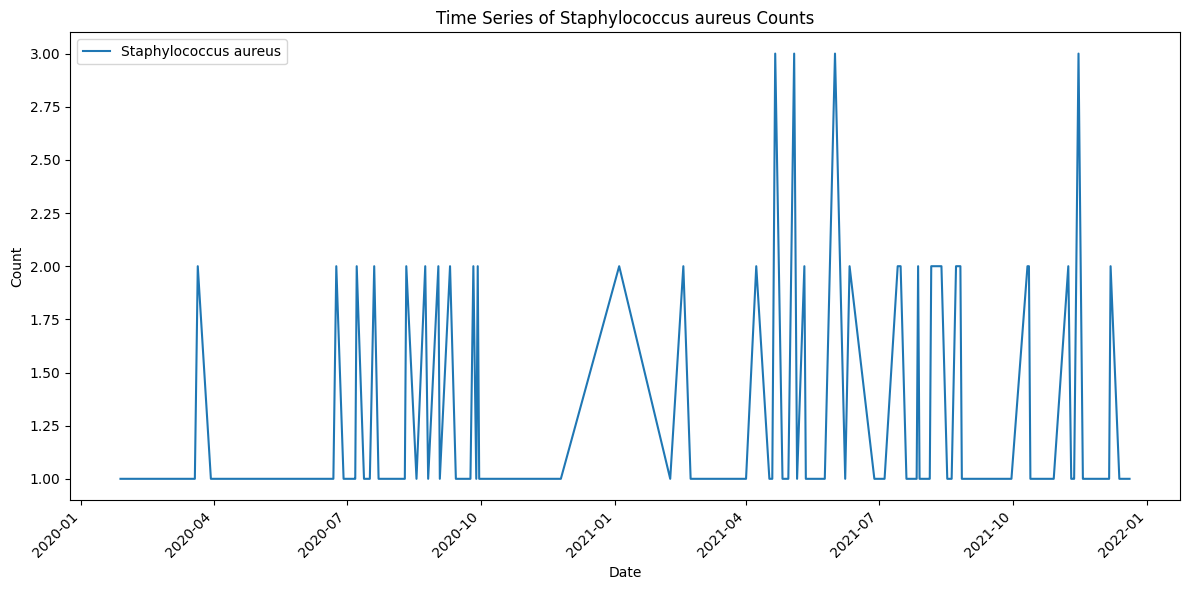

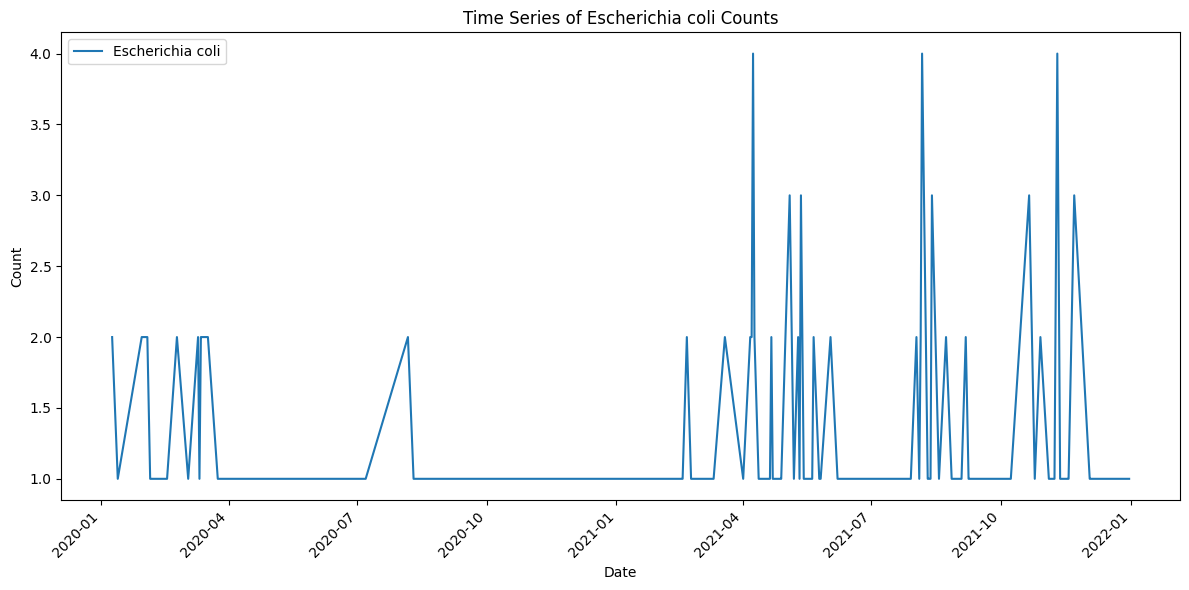

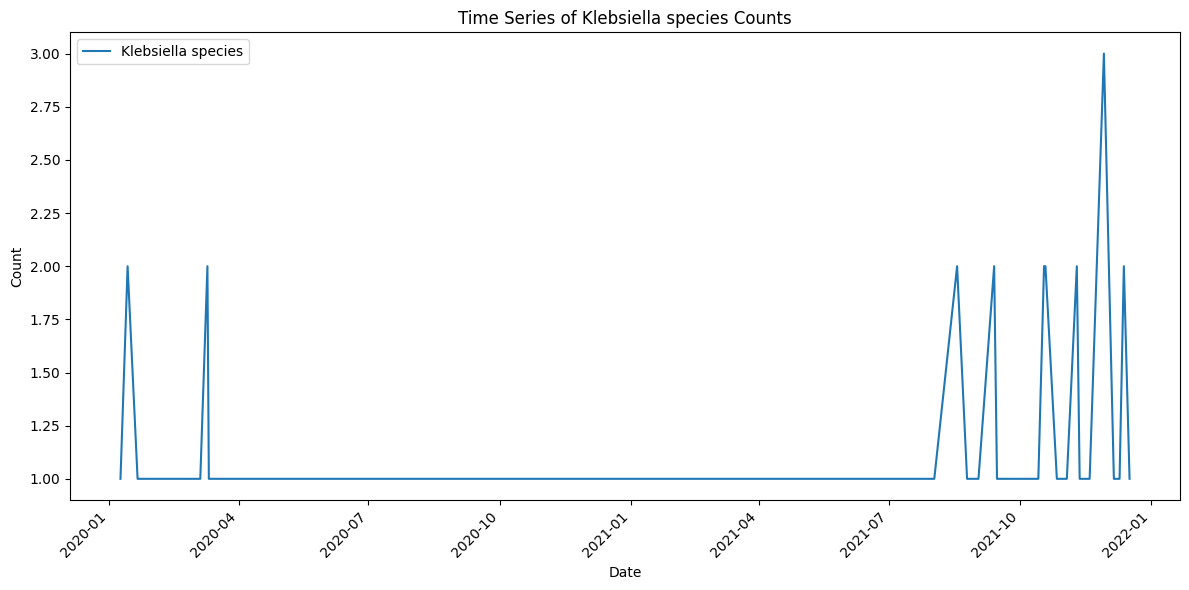

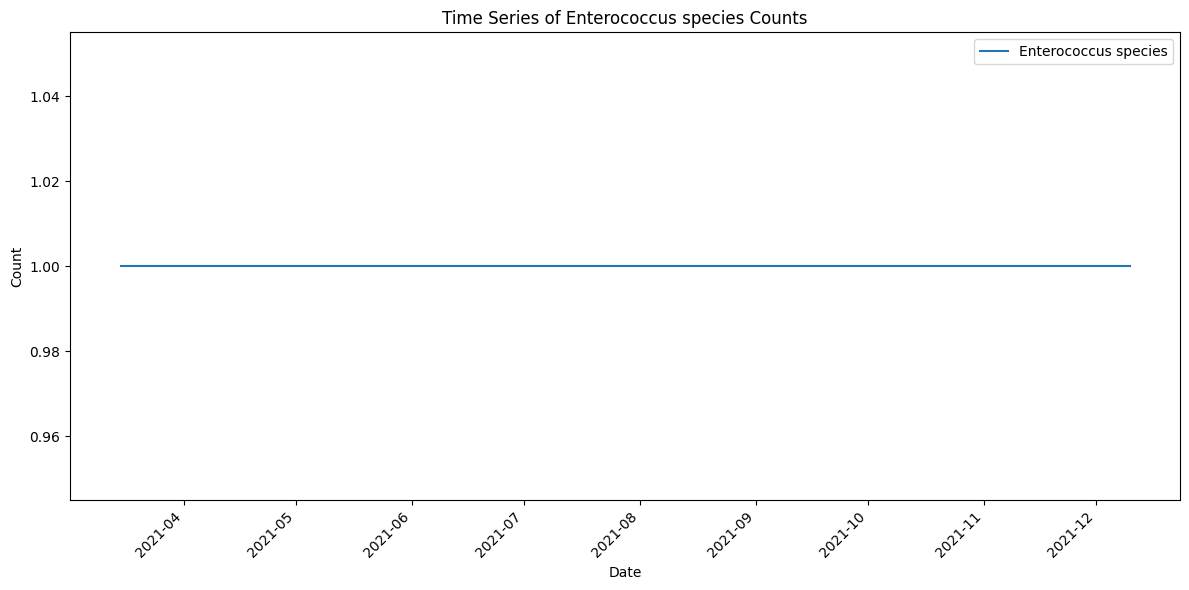

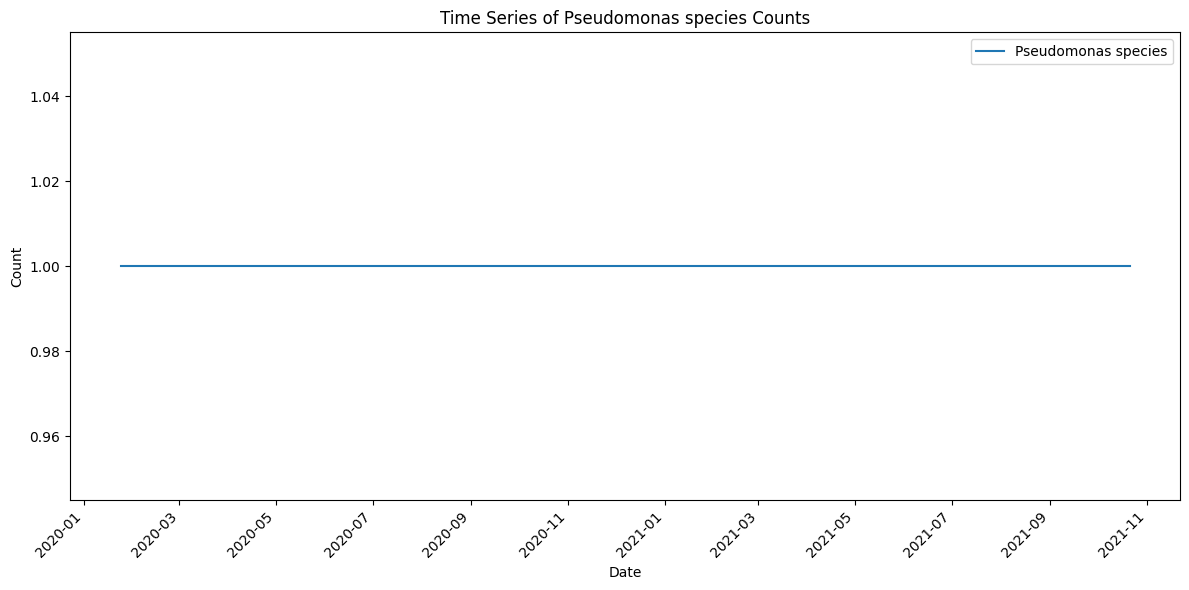

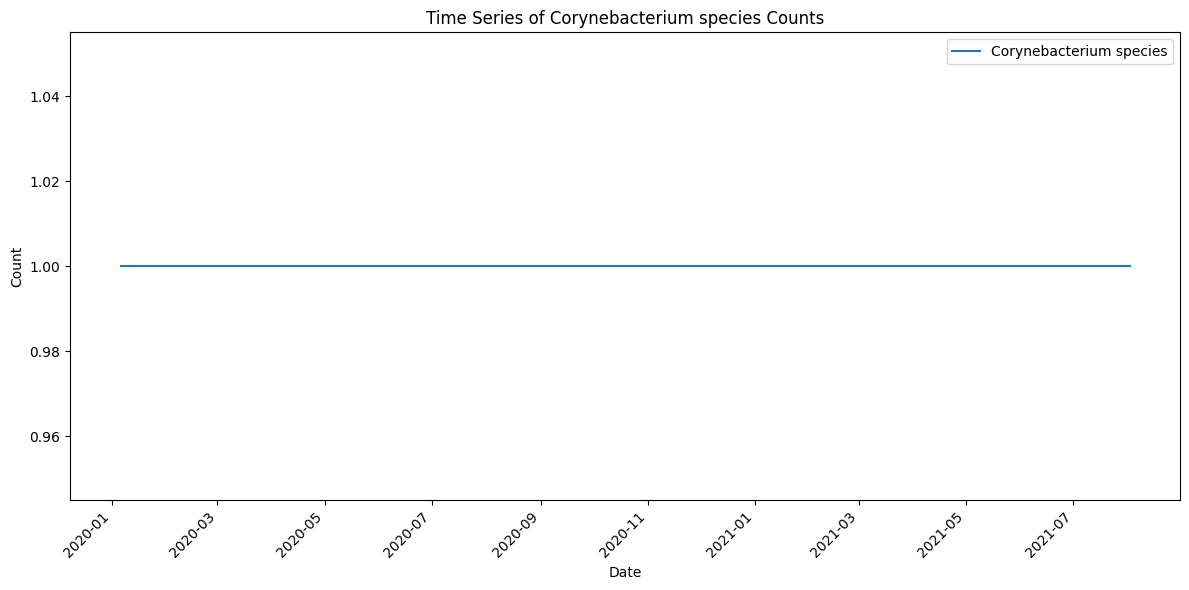

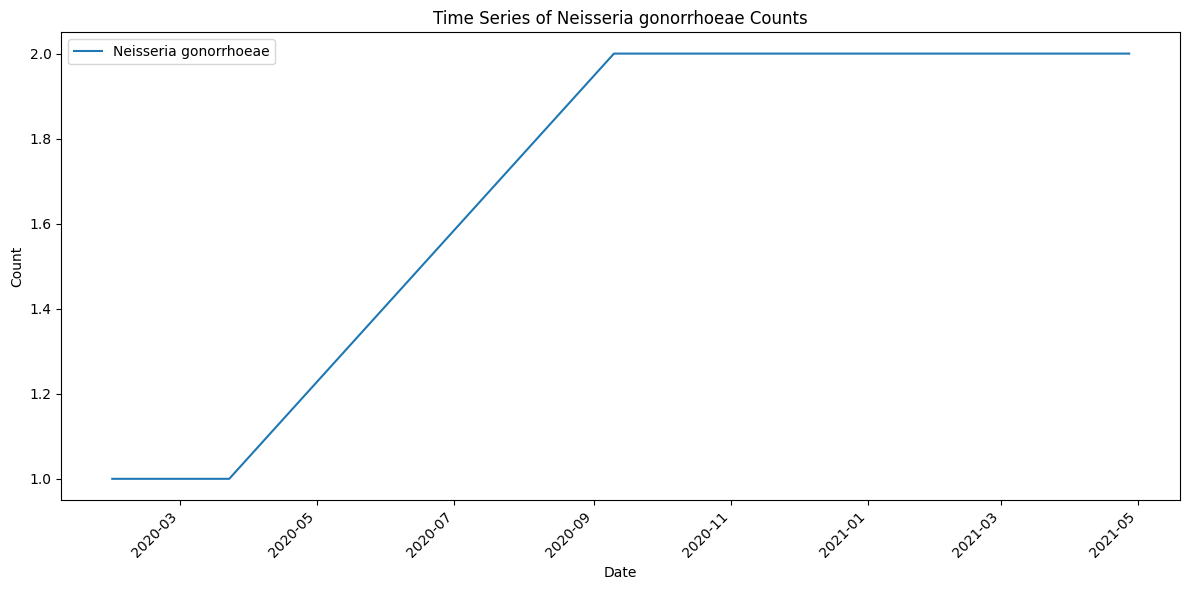

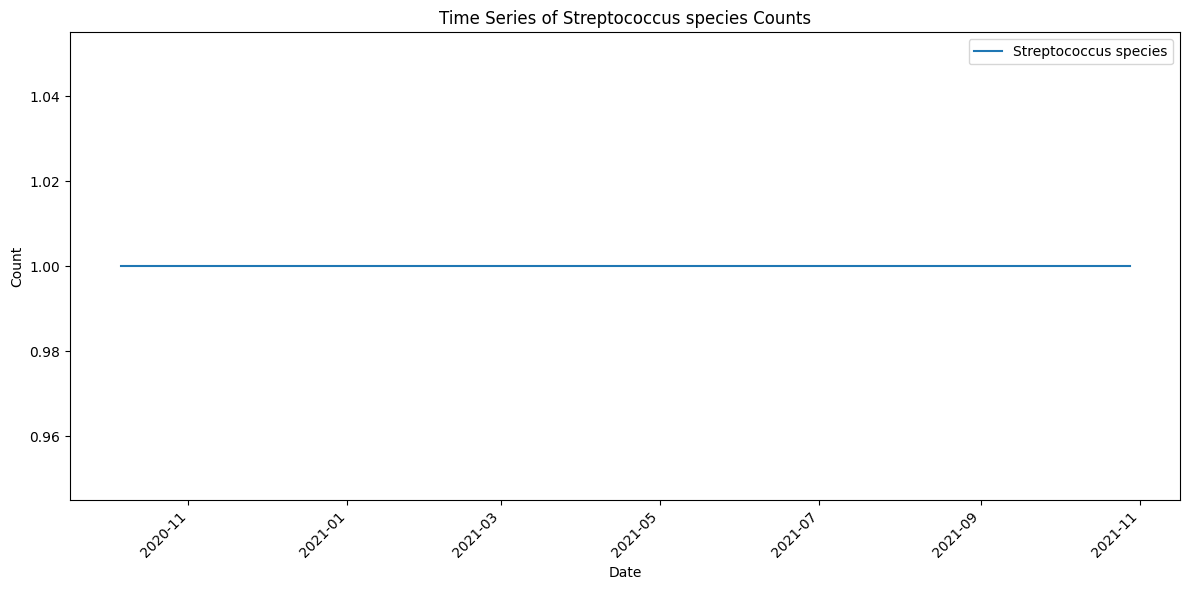

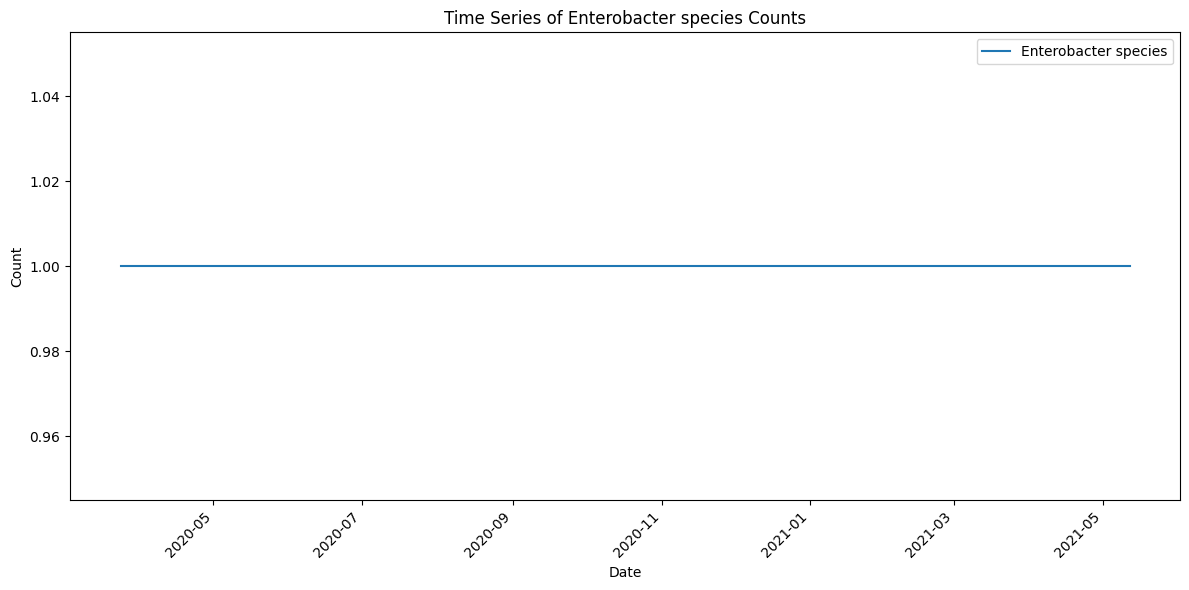

In [227]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_data is your DataFrame

# Get the top organisms
top_organisms = filtered_data['Organism'].value_counts().index.tolist()

# Group data by organism and date, then get counts
organism_time_series = filtered_data.groupby(['Organism', 'Specimen date'])['Organism'].count().reset_index(name='Count')

# Create time series plots for each organism in separate figures
for organism in top_organisms:
    organism_data = organism_time_series[organism_time_series['Organism'] == organism]

    fig, ax = plt.subplots(figsize=(12, 6))  # Create a new figure for each organism
    ax.plot(organism_data['Specimen date'], organism_data['Count'], label=organism)

    # Customize the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Count')
    ax.set_title(f'Time Series of {organism} Counts')  # Organism-specific title
    ax.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()  # Display the plot for the current organism

In [ ]:
#Let us do a time series




In [184]:
import pandas as pd

# ... (your existing code for loading urine_data) ...

# Calculate descriptive statistics for the 'Age' column
age_stats = filtered_data['Age'].describe()

# Compute interquartile range
iqr = int(age_stats['75%'] - age_stats['25%'])  # Convert IQR to integer

# Print the descriptive statistics as integers
print("Age Descriptive Statistics:")
for stat_name, stat_value in age_stats.items():
    if stat_name in ['25%', '50%', '75%']:  # Convert percentiles to integers
        print(f"{stat_name}: {int(stat_value)}")
    else:
        print(f"{stat_name}: {int(stat_value)}")  # Convert other stats to integers

# Print interquartile range as integer
print("\nInterquartile Range (IQR):", iqr)

Age Descriptive Statistics:
count: 808
mean: 38
std: 18
min: 0
25%: 25
50%: 35
75%: 49
max: 93

Interquartile Range (IQR): 24


In [185]:
# Replace 'f' with 'F' in the 'Sex' column
# Replace 'f' with 'F' in the 'Sex' column using .loc
filtered_data.loc[:, 'Sex'] = filtered_data['Sex'].replace({'f': 'F'})
filtered_data.loc[:, 'Sex'] = filtered_data['Sex'].replace({'m': 'M'})


# Verify the changes
gender_counts = filtered_data['Sex'].value_counts()
print("Gender Statistics:")
print(gender_counts)
#compute percentages
#gender_percentages = gender_counts / len(urine_data) * 100
gender_percentages = {gender: round(count / len(filtered_data) * 100, 2)
                      for gender, count in gender_counts.items()}
print("Gender Percentages:")
print(gender_percentages)
print(gender_percentages['M'] / gender_percentages['F'])
#print(urine_data['Sex'].value_counts())
#get male to female ratio in format 1: 1.1
# Calculate and format the male-to-female ratio
male_to_female_ratio = gender_percentages['M'] / gender_percentages['F']
print(f"Female to Male Ratio: 1:{male_to_female_ratio:.1f}") # Format to one decimal place

Gender Statistics:
Sex
F    471
M    337
Name: count, dtype: int64
Gender Percentages:
{'F': 58.29, 'M': 41.71}
0.7155601303825699
Female to Male Ratio: 1:0.7


In [186]:
# Get the length (number of rows) of the urine_data DataFrame
data_length = len(filtered_data)

# Print the length
print("Length of urine_data DataFrame:", data_length)

Length of urine_data DataFrame: 808


In [187]:
import pandas as pd
import numpy as np
filtered_data=filtered_data.copy()
# Categorize age groups
age_bins = [0, 15, 26, 36, 46, 66, float('inf')]
age_labels = ['0-14', '15-25', '26-35', '36-45', '46-65', '>65']
# Assuming 'filtered_data' is your DataFrame and 'Age' exists in it
filtered_data['Age Group'] = pd.cut(filtered_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Function to categorize culture status
def categorize_culture(organism_type):
    if organism_type in ['o', 'f']:
        return 'No Significant Growth'
    elif organism_type == '-':
        return 'Negative'
    elif organism_type == '+':
        return 'Positive'
    else:
        return 'Unknown'

# Apply categorize_culture function to create 'Culture Status' column
filtered_data['Culture Status'] = filtered_data['Organism type'].apply(categorize_culture)

# Ensure all categories ('Positive', 'No Significant Growth', 'Negative') are included in the table
categories = ['Positive', 'No Significant Growth', 'Negative']

# Create contingency tables
age_contingency_table = pd.crosstab(filtered_data['Age Group'], filtered_data['Culture Status'])
gender_contingency_table = pd.crosstab(filtered_data['Sex'], filtered_data['Culture Status'])

# Reindex contingency tables to include all categories, even if some are missing
age_contingency_table = age_contingency_table.reindex(columns=categories, fill_value=0)
gender_contingency_table = gender_contingency_table.reindex(columns=categories, fill_value=0)

# Prepare data for the formatted table
table_data = {
    'Socio Demographic Characteristics': [],
    'Positive': [],
    'No Significant Growth': [],
    'Negative': [],
    'Total': []
}

# Add age group data to the table
for age_group in age_labels:
    row = [age_group]
    total_count = age_contingency_table.loc[age_group].sum()

    for status in categories:
        count = age_contingency_table.loc[age_group, status]  # Now it will not cause KeyError
        percentage = round((count / total_count * 100), 1) if total_count > 0 else 0
        row.append(f"{count} ({percentage}%)")

    row.append(f"{total_count} ({round(total_count / len(filtered_data) * 100, 1)}%)")  # Total for age group

    # Append data to the dictionary
    for i, key in enumerate(['Socio Demographic Characteristics', 'Positive', 'No Significant Growth', 'Negative', 'Total']):
        table_data[key].append(row[i])

# Add gender data to the table
for gender in ['M', 'F']:
    row = [gender]
    total_count = gender_contingency_table.loc[gender].sum()

    for status in categories:
        count = gender_contingency_table.loc[gender, status]  # Now it will not cause KeyError
        percentage = round((count / total_count * 100), 1) if total_count > 0 else 0
        row.append(f"{count} ({percentage}%)")

    row.append(f"{total_count} ({round(total_count / len(filtered_data) * 100, 1)}%)")  # Total for gender

    # Append data to the dictionary
    for i, key in enumerate(['Socio Demographic Characteristics', 'Positive', 'No Significant Growth', 'Negative', 'Total']):
        table_data[key].append(row[i])

# Create the final table
table = pd.DataFrame(table_data)

# Calculate horizontal totals
total_row = ['Total']
total_positive = age_contingency_table['Positive'].sum()
total_no_significant_growth = age_contingency_table['No Significant Growth'].sum()
total_negative = age_contingency_table['Negative'].sum()

# Compute overall counts and percentage
total_count = total_positive + total_no_significant_growth + total_negative
total_row.extend([
    f"{total_positive} ({round((total_positive / total_count) * 100, 1)}%)",
    f"{total_no_significant_growth} ({round((total_no_significant_growth / total_count) * 100, 1)}%)",
    f"{total_negative} ({round((total_negative / total_count) * 100, 1)}%)",
    f"{total_count} (100%)"
])

# Append the total row to the table
table.loc[len(table)] = total_row

# Display table
print("Table 1: Age and Gender Distribution of Patients with Urine Culture and Sensitivity, Mbarara Regional Referral Hospital")
print("Western Uganda")
print(table)


Table 1: Age and Gender Distribution of Patients with Urine Culture and Sensitivity, Mbarara Regional Referral Hospital
Western Uganda
  Socio Demographic Characteristics     Positive No Significant Growth  \
0                              0-14    7 (19.4%)              0 (0.0%)   
1                             15-25   95 (49.5%)              0 (0.0%)   
2                             26-35   93 (48.9%)              3 (1.6%)   
3                             36-45   65 (42.5%)              1 (0.7%)   
4                             46-65   75 (49.3%)              1 (0.7%)   
5                               >65   26 (30.6%)              0 (0.0%)   
6                                 M  196 (58.2%)              2 (0.6%)   
7                                 F  165 (35.0%)              3 (0.6%)   
8                             Total  361 (44.7%)              5 (0.6%)   

      Negative        Total  
0   29 (80.6%)    36 (4.5%)  
1   97 (50.5%)  192 (23.8%)  
2   94 (49.5%)  190 (23.5%)  
3   

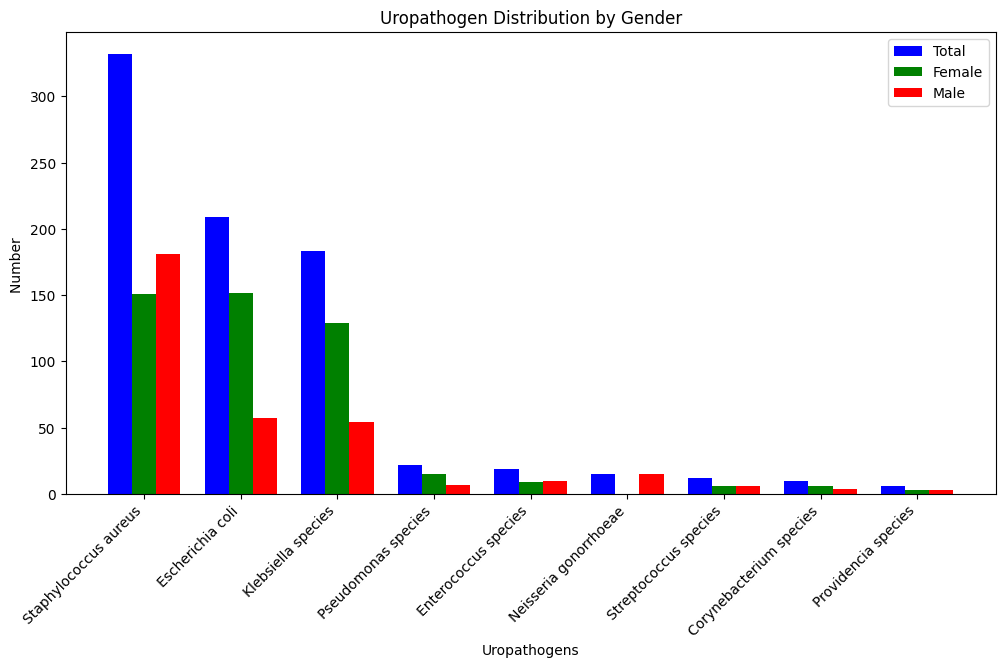

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 15 organisms
#top_10_organisms = organism_counts.sort_values(by=['Total'], ascending=False)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

# Set bar width
bar_width = 0.25

# Set positions for bars
r1 = np.arange(len(top_10_organisms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot bars
ax.bar(r1, top_10_organisms['Total'], color='b', width=bar_width, label='Total')
ax.bar(r2, top_10_organisms['Female'], color='g', width=bar_width, label='Female')
ax.bar(r3, top_10_organisms['Male'], color='r', width=bar_width, label='Male')

# Add labels, title, and legend
ax.set_xlabel('Uropathogens')
ax.set_ylabel('Number ')
ax.set_title('Uropathogen Distribution by Gender')
ax.set_xticks([r + bar_width for r in range(len(top_10_organisms))])
ax.set_xticklabels(top_10_organisms.index, rotation=45, ha='right')
ax.legend()

# Display the graph
plt.show()


In [189]:
# prompt: code to calculate organism_counts_by_age_group

# Assuming 'filtered_data' DataFrame is already created as in your provided code.

organism_counts_by_age_group = filtered_data.groupby(['Organism', 'Age Group'])['Organism'].count().unstack(fill_value=0)
organism_counts_by_age_group

<ipython-input-189-da19e2ff40cf>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  organism_counts_by_age_group = filtered_data.groupby(['Organism', 'Age Group'])['Organism'].count().unstack(fill_value=0)


Age Group,0-14,15-25,26-35,36-45,46-65,>65
Organism,,,,,,
Corynebacterium species,0,4,0,4,2,0
Enterococcus species,0,1,5,5,6,2
Escherichia coli,14,39,36,42,39,39
Klebsiella species,12,37,55,37,29,13
Neisseria gonorrhoeae,2,8,0,2,2,1
Providencia species,0,2,0,0,2,2
Pseudomonas species,1,7,4,3,3,4
Staphylococcus aureus,6,91,86,58,67,24
Streptococcus species,1,3,4,2,2,0


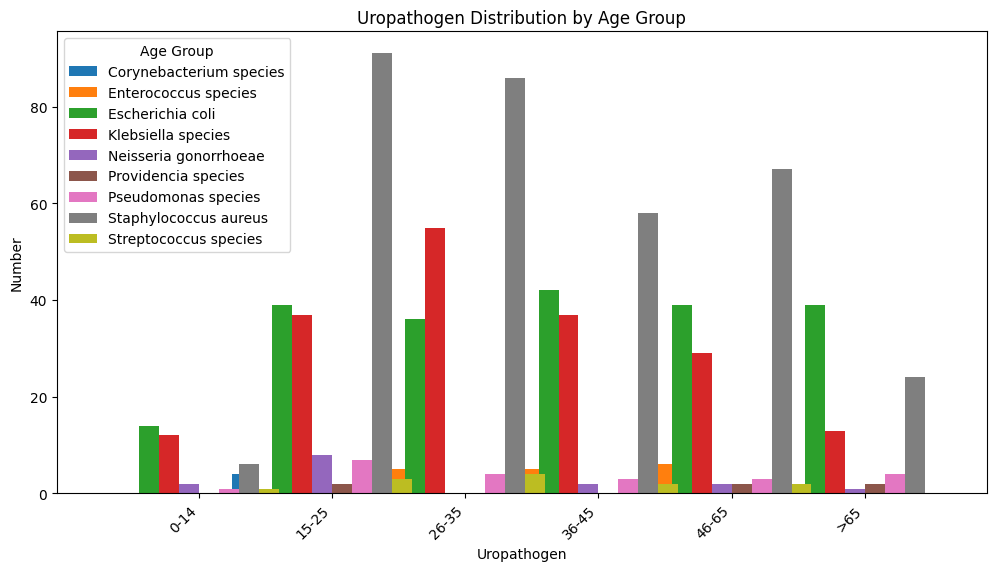

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your previous code to calculate organism_counts_by_age_group) ...

# Transpose the DataFrame for plotting (if not already transposed)
organism_counts_by_age_group = organism_counts_by_age_group.T

# Set the width of the bars
bar_width = 0.15  # Adjust as needed

# Get the positions of the bars on the x-axis
x_pos = np.arange(len(organism_counts_by_age_group.index))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

for i, age_group in enumerate(organism_counts_by_age_group.columns):
    ax.bar(x_pos + i * bar_width, organism_counts_by_age_group[age_group], width=bar_width, label=age_group)

# Customize the chart
ax.set_xlabel('Uropathogen')
ax.set_ylabel('Number')
ax.set_title('Uropathogen Distribution by Age Group')

ax.set_xticks(x_pos + bar_width * (len(organism_counts_by_age_group.columns) / 2))  # Center the x-axis labels
ax.set_xticklabels(organism_counts_by_age_group.index, rotation=45, ha='right')
ax.legend(title='Age Group')

# Display the chart
plt.show()

In [193]:
import pandas as pd

# ... (your previous code to load, process, and encode urine_data) ...

# Select columns containing antibiotic data (encoded columns)
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]  # Corrected line

# Create a dictionary to store the counts
antibiotic_counts = {}

# Iterate through antibiotic columns and count I, R, S
for column in antibiotic_columns:
    antibiotic_name = column[:-2]  # Extract antibiotic name from column name

    # Get the category (I, R, or S) from the column name
    category = column[-1]

    # Store the count in the dictionary, creating a new entry for the antibiotic if needed
    if antibiotic_name not in antibiotic_counts:
        antibiotic_counts[antibiotic_name] = {'I': 0, 'R': 0, 'S': 0}  # Initialize counts to 0

    antibiotic_counts[antibiotic_name][category] = urine_data[column].sum()
# Convert the dictionary to a DataFrame for better display
antibiotic_counts_df = pd.DataFrame(antibiotic_counts).T
antibiotic_counts_df.index.name = 'Antibiotic'
# Display the results
print(antibiotic_counts_df)

print(len(urine_data))

                              I    R    S
Antibiotic                               
Amoxicillin                   1  135   45
Amoxicillin/Clavulanic Acid   7  185  101
Amikacin                      0    1  127
Ampicillin                    4  399   41
Azithromycin                  0   71   59
Cefepime                      0    2    0
Bacitracin                    0    0    0
Ceftriaxone                   3   79  251
Cefuroxime                    8  122  450
Ciprofloxacin                12  113  191
Oxacillin                     0   31   31
Chloramphenicol               7  352  225
Cefazolin                     7  319  225
Clindamycin                   1  214  110
Gentamicin                    3  118  406
Gentaheptose                  1    0    6
Erythromycin                  7  221   46
Tetracycline                  4  588  126
Rifampicin                    0    1    4
Ofloxacin                     0    2  204
Sulfamethoxazole              3  390   47
Optochin                      0   

In [194]:
encoded_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
for col in encoded_columns:
       urine_data[col] = urine_data[col].astype(int)  # Convert to integers if necessary
       urine_data[col] = urine_data[col].clip(0, 1)  # Clip values to be between 0 and 1

In [ ]:
#Let us remove the antibiotics that have only zeros for I, R and S from our encoded columns


In [196]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Remove antibiotics with only zeros for I, R, and S
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]
antibiotics_to_remove = []
for antibiotic_col in antibiotic_columns:
    if filtered_data[antibiotic_col].sum() == 0:
        antibiotics_to_remove.append(antibiotic_col[:-2])  # Remove the suffix (_I, _R, _S)

# Filter out the columns to remove
filtered_data = filtered_data[[col for col in filtered_data.columns if col[:-2] not in antibiotics_to_remove or not col.endswith(('_I', '_R', '_S'))]]

# ... (rest of your code to generate the susceptibility table) ...

In [197]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

import pandas as pd

# ... (your previous code to load, process, and encode urine_data) ...

# Select columns containing antibiotic data (encoded columns)
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]

# Create a dictionary to store the counts
antibiotic_counts = {}

# Iterate through antibiotic columns and count I, R, S
for column in antibiotic_columns:
    antibiotic_name = column[:-2]  # Extract antibiotic name from column name

    # Initialize counts for the antibiotic if not already present
    if antibiotic_name not in antibiotic_counts:
        antibiotic_counts[antibiotic_name] = {'Resistant': 0, 'Sensitive': 0, 'Total Culture': 0}

    # Get the category (I, R, or S) from the column name
    category = column[-1]

    # Update counts based on category
    if category in ('I', 'R'):
        antibiotic_counts[antibiotic_name]['Resistant'] += filtered_data[column].sum()
    elif category == 'S':
        antibiotic_counts[antibiotic_name]['Sensitive'] += filtered_data[column].sum()

    # Update Total Culture count
    antibiotic_counts[antibiotic_name]['Total Culture'] = antibiotic_counts[antibiotic_name]['Resistant'] + antibiotic_counts[antibiotic_name]['Sensitive']

# Dynamically generate antimicrobial_agents list from antibiotic_counts keys
antimicrobial_agents = list(antibiotic_counts.keys())

# Create a dictionary to store the table data
table_data = {'Antimicrobial\nAgents': antimicrobial_agents,
              'No. of Cultures Tested': [],
              'Resistant No (%)': [],
              'Sensitive No (%)': []}

# Iterate through antimicrobial agents and populate the table data
for agent in antimicrobial_agents:
    total_culture = antibiotic_counts[agent]['Total Culture']
    resistant = antibiotic_counts[agent]['Resistant']
    sensitive = antibiotic_counts[agent]['Sensitive']

    table_data['No. of Cultures Tested'].append(total_culture)
    table_data['Resistant No (%)'].append(f"{resistant} ({resistant / total_culture * 100:.1f}%)" if total_culture else '0 (0.0%)')
    table_data['Sensitive No (%)'].append(f"{sensitive} ({sensitive / total_culture * 100:.1f}%)" if total_culture else '0 (0.0%)')

# Create the DataFrame
susceptibility_table = pd.DataFrame(table_data)
#sort ascending
susceptibility_table = susceptibility_table.sort_values(by='Antimicrobial\nAgents', ascending=True)
# Display the table using data_table formatter
display(susceptibility_table)

,Antimicrobial\nAgents,No. of Cultures Tested,Resistant No (%),Sensitive No (%)
0,Amoxicillin,180,136 (75.6%),44 (24.4%)
1,Amoxicillin/Clavulanic Acid,285,185 (64.9%),100 (35.1%)
2,Ampicillin,434,393 (90.6%),41 (9.4%)
24,Azlocillin,2,1 (50.0%),1 (50.0%)
23,Aztreonam,13,7 (53.8%),6 (46.2%)
19,Cefaclor,37,22 (59.5%),15 (40.5%)
7,Cefazolin,539,320 (59.4%),219 (40.6%)
22,Cefotaxime,200,54 (27.0%),146 (73.0%)
25,Cefoxitin 30 mg,64,26 (40.6%),38 (59.4%)
3,Ceftriaxone,328,81 (24.7%),247 (75.3%)


In [198]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = filtered_data['Organism'].unique()
antibiotic_columns = filtered_data.columns[filtered_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data (organisms as rows, antibiotics as columns)
table_data = {}

# Loop through organisms and antimicrobial agents to populate the table
for organism in unique_organisms:
    for agent in antimicrobial_agents:
        # Create keys for 'T' and 'RNo (%)' for each organism-antibiotic pair
        total_key = organism + ' T_' + agent  # Unique key for Total
        rno_key = organism + ' RNo (%)_' + agent  # Unique key for RNo (%)

        try:
            # Calculate total tested and resistant count
            total_tested = filtered_data.loc[filtered_data['Organism'] == organism, [agent + '_I', agent + '_R', agent + '_S']].sum().sum()
            resistant_count = filtered_data.loc[filtered_data['Organism'] == organism, [agent + '_I', agent + '_R']].sum().sum()

            # Store values in the table_data dictionary
            table_data[total_key] = total_tested
            table_data[rno_key] = f"{resistant_count} ({resistant_count / total_tested * 100:.1f})" if total_tested else 'ND'

        except KeyError:
            # Handle cases where the agent is not found for the current organism
            table_data[total_key] = 'ND'
            table_data[rno_key] = 'ND'

# Create the DataFrame
susceptibility_table = pd.DataFrame([table_data]).T.rename(columns={0: 'Value'})

# Split the index values safely with conditional checks
susceptibility_table['Organism'] = susceptibility_table.index.map(lambda x: x.split(' T_')[0] if ' T_' in x else x.split(' RNo (%)_')[0])
susceptibility_table['Type'] = susceptibility_table.index.map(lambda x: 'T' if ' T_' in x else 'RNo (%)')
susceptibility_table['Antibiotic'] = susceptibility_table.index.map(lambda x: x.split(' T_')[1] if ' T_' in x else x.split(' RNo (%)_')[1])

# Reshape the DataFrame to have organisms as rows
susceptibility_table = susceptibility_table.set_index(['Organism', 'Type', 'Antibiotic'])['Value'].unstack('Antibiotic')
#remove all antibiotics that have only ND values throughout
susceptibility_table = susceptibility_table.loc[:, (susceptibility_table != 'ND').any(axis=0)]
#sort ascending
susceptibility_table = susceptibility_table.sort_values(by='Organism', ascending=True)

# Display the table using data_table formatter
display(susceptibility_table)

Antibiotic                      Amoxicillin Amoxicillin/Clavulanic Acid  \
Organism                Type                                              
Corynebacterium species RNo (%)          ND                    4 (80.0)   
                        T                 0                           5   
Enterococcus species    RNo (%)     0 (0.0)                    2 (22.2)   
                        T                 2                           9   
Escherichia coli        RNo (%)   26 (66.7)                   68 (76.4)   
                        T                39                          89   
Klebsiella species      RNo (%)   40 (76.9)                   46 (85.2)   
                        T                52                          54   
Neisseria gonorrhoeae   T                 0                           3   
                        RNo (%)          ND                    1 (33.3)   
Providencia species     RNo (%)          ND                   1 (100.0)   
                        T                 0                           1   
Pseudomonas species     RNo (%)   3 (100.0)                    6 (75.0)   
                        T                 3                           8   
Staphylococcus aureus   RNo (%)   67 (79.8)                   56 (50.0)   
                        T                84                         112   
Streptococcus species   RNo (%)          ND                    1 (25.0)   
                        T                 0                           4   

Antibiotic                       Ampicillin  Aztreonam  Cefaclor   Cefazolin  \
Organism                Type                                                   
Corynebacterium species RNo (%)   9 (100.0)    0 (0.0)        ND    2 (33.3)   
                        T                 9          2         0           6   
Enterococcus species    RNo (%)    3 (33.3)         ND        ND    3 (60.0)   
                        T                 9          0         0           5   
Escherichia coli        RNo (%)  139 (90.3)   2 (50.0)  7 (63.6)   45 (36.9)   
                        T               154          4        11         122   
Klebsiella species      RNo (%)  111 (97.4)  1 (100.0)  8 (53.3)   78 (63.9)   
                        T               114          1        15         122   
Neisseria gonorrhoeae   T                 5          0         0           8   
                        RNo (%)   5 (100.0)         ND        ND    6 (75.0)   
Providencia species     RNo (%)    5 (83.3)         ND        ND    2 (50.0)   
                        T                 6          0         0           4   
Pseudomonas species     RNo (%)   13 (86.7)    0 (0.0)  1 (33.3)    5 (33.3)   
                        T                15          2         3          15   
Staphylococcus aureus   RNo (%)  107 (89.9)  3 (100.0)  6 (75.0)  175 (70.3)   
                        T               119          3         8         249   
Streptococcus species   RNo (%)    1 (33.3)  1 (100.0)        ND    4 (50.0)   
                        T                 3          1         0           8   

Antibiotic                      Cefotaxime Cefoxitin 30 mg Ceftriaxone  \
Organism                Type                                             
Corynebacterium species RNo (%)   3 (75.0)        1 (50.0)    4 (80.0)   
                        T                4               2           5   
Enterococcus species    RNo (%)    0 (0.0)              ND     0 (0.0)   
                        T                1               0           4   
Escherichia coli        RNo (%)  12 (23.5)        7 (43.8)   27 (31.8)   
                        T               51              16          85   
Klebsiella species      RNo (%)  15 (28.3)        4 (26.7)   16 (17.6)   
                        T               53              15          91   
Neisseria gonorrhoeae   T                3               2           6   
                        RNo (%)   1 (33.3)         0 (0.0)     0 (0.0)   
Providenci

In [199]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
#export the dataframe to csv
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)


In [200]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data
table_data = {'Bacterial Isolates': [], 'R0 No (%)': [], 'R1 No (%)': [], 'R2 No (%)': [],
              'R3 No (%)': [], 'R4 No (%)': [], 'R5 No (%)': [], 'R6 No (%)': [], '>R7 No (%)': []}

# Iterate through unique organisms
for organism in unique_organisms:
    # Get organism count, handling potential KeyError
    organism_count = urine_data['Organism'].value_counts().get(organism, 0)

    table_data['Bacterial Isolates'].append(f"{organism} ({organism_count})")

    # Count resistance levels for the organism
    resistance_counts = [0] * 8  # Initialize counts for R0 to >R7

    for _, row in urine_data[urine_data['Organism'] == organism].iterrows():
        resistance_level = 0
        for agent in antimicrobial_agents:
            # Check if antibiotic columns exist for this organism before accessing them
            if agent + '_I' in row and agent + '_R' in row:
                if row[agent + '_I'] == 1 or row[agent + '_R'] == 1:
                    resistance_level += 1

        if resistance_level <= 6:
            resistance_counts[resistance_level] += 1
        else:
            resistance_counts[7] += 1  # Count for >R7

    # Calculate percentages and format for the table
    total_isolates = urine_data['Organism'].value_counts().get(organism, 0)  # Handle KeyError
    for i in range(len(resistance_counts)):
        percentage = (resistance_counts[i] / total_isolates) * 100 if total_isolates else 0
        table_data[f"R{i} No (%)" if i <= 6 else ">R7 No (%)"].append(f"{resistance_counts[i]} ({percentage:.1f})")

# Create the DataFrame
multi_drug_resistance_table = pd.DataFrame(table_data)

# Display the table using data_table formatter
display(multi_drug_resistance_table)

,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),>R7 No (%)
0,Escherichia coli (209),1 (0.5),11 (5.3),14 (6.7),31 (14.8),51 (24.4),40 (19.1),28 (13.4),33 (15.8)
1,Staphylococcus aureus (332),4 (1.2),12 (3.6),23 (6.9),35 (10.5),51 (15.4),79 (23.8),68 (20.5),60 (18.1)
2,Klebsiella species (183),2 (1.1),3 (1.6),14 (7.7),25 (13.7),46 (25.1),49 (26.8),20 (10.9),24 (13.1)
3,Enterococcus species (19),0 (0.0),2 (10.5),1 (5.3),9 (47.4),1 (5.3),2 (10.5),3 (15.8),1 (5.3)
4,Streptococcus species (12),0 (0.0),1 (8.3),2 (16.7),1 (8.3),3 (25.0),1 (8.3),2 (16.7),2 (16.7)
5,Pseudomonas species (22),2 (9.1),0 (0.0),1 (4.5),5 (22.7),3 (13.6),4 (18.2),1 (4.5),6 (27.3)
6,Moraxella catarrhalis (2),0 (0.0),0 (0.0),0 (0.0),0 (0.0),1 (50.0),0 (0.0),0 (0.0),1 (50.0)
7,Corynebacterium species (10),0 (0.0),0 (0.0),0 (0.0),3 (30.0),3 (30.0),0 (0.0),0 (0.0),4 (40.0)
8,Enterobacter species (5),0 (0.0),1 (20.0),1 (20.0),0 (0.0),1 (20.0),0 (0.0),1 (20.0),1 (20.0)
9,Candida species (2),0 (0.0),0 (0.0),0 (0.0),0 (0.0),0 (0.0),2 (100.0),0 (0.0),0 (0.0)


In [201]:
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

# ... (your existing code to load and preprocess urine_data) ...

# Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# Create a dictionary to store the table data
table_data = {'Bacterial Isolates': [], 'R0 No (%)': [], 'R1 No (%)': [], 'R2 No (%)': [],
              'R3 No (%)': [], 'R4 No (%)': [], 'R5 No (%)': [], 'R6 No (%)': [], '>R7 No (%)': []}

# Iterate through unique organisms
for organism in unique_organisms:
    # Get organism count, handling potential KeyError
    organism_count = urine_data['Organism'].value_counts().get(organism, 0)

    table_data['Bacterial Isolates'].append(f"{organism} ({organism_count})")

    # Calculate resistance counts for each category directly
    resistance_counts = [0] * 8  # Initialize counts for R0 to >R7

    for i in range(len(resistance_counts)):
        # Calculate count for current resistance level (R0 to >R7)
        count = 0
        for _, row in urine_data[urine_data['Organism'] == organism].iterrows():
            resistance_level = 0
            for agent in antimicrobial_agents:
                if agent + '_I' in row and agent + '_R' in row:
                    if row[agent + '_I'] == 1 or row[agent + '_R'] == 1:
                        resistance_level += 1

            if resistance_level == i:  # Check if resistance level matches current category
                count += 1
            elif resistance_level > 6 and i == 7: # For >R7 category
                count += 1

        resistance_counts[i] = count

    # Calculate percentages and format for the table
    total_isolates = urine_data['Organism'].value_counts().get(organism, 0)  # Handle KeyError
    for i in range(len(resistance_counts)):
        percentage = (resistance_counts[i] / total_isolates) * 100 if total_isolates else 0
        table_data[f"R{i} No (%)" if i <= 6 else ">R7 No (%)"].append(f"{resistance_counts[i]} ({percentage:.1f}%)")

# Create the DataFrame
multi_drug_resistance_table = pd.DataFrame(table_data)

# Display the table using data_table formatter
display(multi_drug_resistance_table)

,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),>R7 No (%)
0,Escherichia coli (209),1 (0.5%),11 (5.3%),14 (6.7%),31 (14.8%),51 (24.4%),40 (19.1%),28 (13.4%),33 (15.8%)
1,Staphylococcus aureus (332),4 (1.2%),12 (3.6%),23 (6.9%),35 (10.5%),51 (15.4%),79 (23.8%),68 (20.5%),60 (18.1%)
2,Klebsiella species (183),2 (1.1%),3 (1.6%),14 (7.7%),25 (13.7%),46 (25.1%),49 (26.8%),20 (10.9%),24 (13.1%)
3,Enterococcus species (19),0 (0.0%),2 (10.5%),1 (5.3%),9 (47.4%),1 (5.3%),2 (10.5%),3 (15.8%),1 (5.3%)
4,Streptococcus species (12),0 (0.0%),1 (8.3%),2 (16.7%),1 (8.3%),3 (25.0%),1 (8.3%),2 (16.7%),2 (16.7%)
5,Pseudomonas species (22),2 (9.1%),0 (0.0%),1 (4.5%),5 (22.7%),3 (13.6%),4 (18.2%),1 (4.5%),6 (27.3%)
6,Moraxella catarrhalis (2),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (50.0%),0 (0.0%),0 (0.0%),1 (50.0%)
7,Corynebacterium species (10),0 (0.0%),0 (0.0%),0 (0.0%),3 (30.0%),3 (30.0%),0 (0.0%),0 (0.0%),4 (40.0%)
8,Enterobacter species (5),0 (0.0%),1 (20.0%),1 (20.0%),0 (0.0%),1 (20.0%),0 (0.0%),1 (20.0%),1 (20.0%)
9,Candida species (2),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),2 (100.0%),0 (0.0%),0 (0.0%)


In [202]:
from datetime import date
print(urine_data['Specimen date'])



209     2021-12-31
236     2021-12-20
244     2021-12-17
261     2021-12-15
276     2021-12-14
           ...    
20340   2018-04-13
20341   2018-04-13
20344   2018-05-28
20368   2018-04-25
20371   2018-05-08
Name: Specimen date, Length: 822, dtype: datetime64[ns]


In [203]:
# Ensure 'Specimen date' column is in datetime format
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')

# Now, extract the year from the 'Specimen date' column
urine_data['Year'] = urine_data['Specimen date'].dt.year

# Check the first few rows to ensure the conversion worked
print(urine_data[['Specimen date', 'Year']].head())


    Specimen date  Year
209    2021-12-31  2021
236    2021-12-20  2021
244    2021-12-17  2021
261    2021-12-15  2021
276    2021-12-14  2021


<ipython-input-203-daabf7a35bca>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  urine_data['Year'] = urine_data['Specimen date'].dt.year


In [204]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of antimicrobial agents (without '_I' and '_R' suffixes)
antimicrobial_agents = list(set([col[:-2] for col in urine_data.columns if col.endswith('_I') or col.endswith('_R')]))

# Check and print columns to confirm presence of antibiotic-related columns
print("Columns in the dataset:", urine_data.columns)

# Initialize an empty DataFrame to store the result
result_data = pd.DataFrame()

# Step 4: Iterate through all organism-year combinations and calculate resistance counts
for organism in unique_organisms:
    # Initialize a list to store resistance counts over the years for Chi-square test
    resistance_over_years = []

    for year in urine_data['Year'].unique():
        # Filter data for the given organism and year
        year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

        organism_count = year_data.shape[0]  # Get the total count of the organism in that year

        # Initialize counts for resistance levels and MDR
        resistance_counts = [0] * 8  # Initialize counts for R0 to >R7
        mdr_count = 0  # MDR is defined as resistance to ≥3 antibiotics

        if organism_count == 0:
            # If no data for this organism-year combination, append default values (0%)
            new_row = pd.DataFrame([{
                'Organism': organism, 'Year': year, 'Bacterial Isolates': 0,
                'R0 No (%)': '0 (0%)', 'R1 No (%)': '0 (0%)', 'R2 No (%)': '0 (0%)',
                'R3 No (%)': '0 (0%)', 'R4 No (%)': '0 (0%)', 'R5 No (%)': '0 (0%)',
                'R6 No (%)': '0 (0%)', 'R7 No (%)': '0 (0%)', '>R7 No (%)': '0 (0%)', 'MDR No (%)': '0 (0%)',
                'p-value': 'N/A'  # No p-value available for empty data
            }])
        else:
            # Loop through the data for the current organism
            for _, row in year_data.iterrows():
                resistance_level = 0

                # Check resistance level for each antibiotic
                for agent in antimicrobial_agents:
                    if f'{agent}_I' in row and f'{agent}_R' in row:
                        # If either '_I' or '_R' column exists, check resistance
                        if row[f'{agent}_I'] == 1 or row[f'{agent}_R'] == 1:
                            resistance_level += 1

                # Increment count based on resistance level
                if resistance_level >= 3:
                    mdr_count += 1  # Count as MDR if resistance to 3 or more antibiotics
                if resistance_level == 0:
                    resistance_counts[0] += 1
                elif resistance_level == 1:
                    resistance_counts[1] += 1
                elif resistance_level == 2:
                    resistance_counts[2] += 1
                elif resistance_level == 3:
                    resistance_counts[3] += 1
                elif resistance_level == 4:
                    resistance_counts[4] += 1
                elif resistance_level == 5:
                    resistance_counts[5] += 1
                elif resistance_level == 6:
                    resistance_counts[6] += 1
                elif resistance_level > 6:
                    resistance_counts[7] += 1

            # Calculate percentages for resistance levels
            total_isolates = organism_count
            resistance_percentages = {
                'R0 No (%)': f"{resistance_counts[0]} ({(resistance_counts[0] / total_isolates) * 100:.1f}%)",
                'R1 No (%)': f"{resistance_counts[1]} ({(resistance_counts[1] / total_isolates) * 100:.1f}%)",
                'R2 No (%)': f"{resistance_counts[2]} ({(resistance_counts[2] / total_isolates) * 100:.1f}%)",
                'R3 No (%)': f"{resistance_counts[3]} ({(resistance_counts[3] / total_isolates) * 100:.1f}%)",
                'R4 No (%)': f"{resistance_counts[4]} ({(resistance_counts[4] / total_isolates) * 100:.1f}%)",
                'R5 No (%)': f"{resistance_counts[5]} ({(resistance_counts[5] / total_isolates) * 100:.1f}%)",
                'R6 No (%)': f"{resistance_counts[6]} ({(resistance_counts[6] / total_isolates) * 100:.1f}%)",
                'R7 No (%)': f"{resistance_counts[7]} ({(resistance_counts[7] / total_isolates) * 100:.1f}%)",
                #'Greater than R7 No (%)': f"0 (0%)",  # Default value for >R7
                'MDR No (%)': f"{mdr_count} ({(mdr_count / total_isolates) * 100:.1f}%)"
            }

            # Append the resistance counts for this year to the list for the Chi-square test
            resistance_over_years.append(resistance_counts)

            # Store the results for this organism-year combination
            new_row = pd.DataFrame([{
                'Organism': organism, 'Year': year, 'Bacterial Isolates': organism_count,
                **resistance_percentages
            }])

        # Concatenate the new row to the result_data DataFrame
        result_data = pd.concat([result_data, new_row], ignore_index=True)

    # After looping through all years for this organism, perform the Chi-square test
    if len(resistance_over_years) > 1:
        # Ensure that no zero values are in the contingency table for the Chi-Square test
        resistance_over_years = [[max(count, 1) for count in year_counts] for year_counts in resistance_over_years]

        # Perform Chi-Square Test for Trend
        chi2, p_value, _, _ = chi2_contingency(resistance_over_years)

        # Append p-value to the last row for this organism
        #two decimal places
        result_data.loc[result_data['Organism'] == organism, 'p-value'] = f"{p_value:.4f}"

        #result_data.loc[result_data['Organism'] == organism, 'p-value'] = p_value

# Display the result table
display(result_data)


Columns in the dataset: Index(['Identification number', 'Specimen number', 'Organism', 'Country',
       'Laboratory', 'Origin', 'Last name', 'First name', 'Sex',
       'Date of Birth',
       ...
       'Cefovecin_R', 'Cefovecin_S', 'Novobiocin_R', 'Novobiocin_S',
       'Cefoxitin 10 mg_R', 'Cefoxitin 10 mg_S', 'Pefloxacin_R',
       'Pefloxacin_S', 'Norfloxacin_S', 'Year'],
      dtype='object', length=156)


,Organism,Year,Bacterial Isolates,R0 No (%),R1 No (%),R2 No (%),R3 No (%),R4 No (%),R5 No (%),R6 No (%),R7 No (%),MDR No (%),p-value,>R7 No (%)
0,Escherichia coli,2021,116,1 (0.9%),7 (6.0%),10 (8.6%),17 (14.7%),33 (28.4%),21 (18.1%),19 (16.4%),8 (6.9%),98 (84.5%),0.0053,NaN
1,Escherichia coli,2020,42,0 (0.0%),3 (7.1%),2 (4.8%),4 (9.5%),6 (14.3%),5 (11.9%),4 (9.5%),18 (42.9%),37 (88.1%),0.0053,NaN
2,Escherichia coli,2019,30,0 (0.0%),1 (3.3%),0 (0.0%),5 (16.7%),6 (20.0%),7 (23.3%),4 (13.3%),7 (23.3%),29 (96.7%),0.0053,NaN
3,Escherichia coli,2018,21,0 (0.0%),0 (0.0%),2 (9.5%),5 (23.8%),6 (28.6%),7 (33.3%),1 (4.8%),0 (0.0%),19 (90.5%),0.0053,NaN
4,Staphylococcus aureus,2021,97,1 (1.0%),6 (6.2%),12 (12.4%),13 (13.4%),17 (17.5%),22 (22.7%),12 (12.4%),14 (14.4%),78 (80.4%),0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Providencia species,2018,4,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),2 (50.0%),2 (50.0%),0 (0.0%),0 (0.0%),4 (100.0%),0.9996,NaN
60,Pseudomonas vulgaris,2021,0,0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),N/A,0 (0%)
61,Pseudomonas vulgaris,2020,0,0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),0 (0%),N/A,0 (0%)
62,Pseudomonas vulgaris,2019,1,0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),0 (0.0%),1 (100.0%),1 (100.0%),NaN,NaN


In [ ]:
urine_data.head()

In [205]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from google.colab import data_table

# Enable DataFrame formatter for Google Colab (optional)
data_table.enable_dataframe_formatter()

# Assuming `urine_data` is preloaded with the appropriate data.

# 1. Ensure 'Specimen date' is in datetime format and extract the year
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')
urine_data['Year'] = urine_data['Specimen date'].dt.year

# 2. Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# 3. Initialize a dictionary to store results for antibiotic resistance analysis
results = {}

# 4. Iterate through organisms, antibiotics, and years to calculate resistance patterns
for organism in unique_organisms:
    results[organism] = {}

    for agent in antimicrobial_agents:
        results[organism][agent] = {'years': [], 'resistance_percentages': [], 'total_counts': []}

        for year in urine_data['Year'].unique():
            year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

            # Calculate individual antibiotic resistance count
            resistant_count = year_data[f'{agent}_R'].sum() if f'{agent}_R' in year_data else 0
            total_count = year_data.shape[0]  # Total isolates for this organism in this year

            # Calculate resistance percentage
            resistance_percentage = (resistant_count / total_count) * 100 if total_count > 0 else 0

            results[organism][agent]['years'].append(year)
            results[organism][agent]['resistance_percentages'].append(resistance_percentage)
            results[organism][agent]['total_counts'].append(total_count)

# 5. Perform Chi-square test and store p-values
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        if len(data['years']) > 1:  # Check if data exists for more than one year
            # Create contingency table (adjusting for zero values)
            contingency_table = [
                [resistant_count, total_count - resistant_count]
                for resistant_count, total_count in zip(data['resistance_percentages'], data['total_counts'])
            ]
            contingency_table = [[max(val, 0.5) for val in row] for row in contingency_table]

            # Perform Chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            results[organism][agent]['p_value'] = p_value

# 6. Create and display the result table (including resistance percentages per year)
resistance_result_table_data = []
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        p_value = data.get('p_value', None)  # Get p-value, or None if not calculated
        if p_value is not None and p_value < 0.05:  # Check for significance
            # Prepare the dictionary for each row of the table
            result_row = {
                'Organism': organism,
                'Antibiotic': agent,
                'P-value': p_value
            }

            # Add resistance percentages per year as columns
            for year, resistance_percentage in zip(data['years'], data['resistance_percentages']):
                result_row[f'Resistance Percentage ({year})'] = round(resistance_percentage, 2)

            resistance_result_table_data.append(result_row)

# Create DataFrame for the result table
resistance_result_table = pd.DataFrame(resistance_result_table_data)

# Display the result table
display(resistance_result_table)


,Organism,Antibiotic,P-value,Resistance Percentage (2021),Resistance Percentage (2020),Resistance Percentage (2019),Resistance Percentage (2018)
0,Escherichia coli,Cefoxitin 30 mg,5.341724e-12,0.86,4.76,13.33,0.00
1,Escherichia coli,Ciprofloxacin,2.338300e-10,20.69,28.57,13.33,0.00
2,Escherichia coli,Sulfamethoxazole,5.293952e-23,50.00,69.05,30.00,47.62
3,Escherichia coli,Amoxicillin/Clavulanic Acid,4.991787e-24,29.31,61.90,20.00,0.00
4,Escherichia coli,Cefaclor,2.631626e-19,1.72,0.00,16.67,0.00
...,...,...,...,...,...,...,...
203,Pseudomonas vulgaris,Tetracycline,3.321126e-08,0.00,0.00,100.00,0.00
204,Pseudomonas vulgaris,Ampicillin,3.321126e-08,0.00,0.00,100.00,0.00
205,Pseudomonas vulgaris,Cefazolin,3.321126e-08,0.00,0.00,100.00,0.00
206,Pseudomonas vulgaris,Vancomycin,3.321126e-08,0.00,0.00,100.00,0.00


In [208]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from google.colab import data_table

# Enable DataFrame formatter for Google Colab (optional)
data_table.enable_dataframe_formatter()

# Assuming `urine_data` is preloaded with the appropriate data.

# 1. Ensure 'Specimen date' is in datetime format and extract the year
urine_data['Specimen date'] = pd.to_datetime(urine_data['Specimen date'], errors='coerce')
urine_data['Year'] = urine_data['Specimen date'].dt.year

# 2. Get unique organisms and antimicrobial agents
unique_organisms = urine_data['Organism'].unique()
antibiotic_columns = urine_data.columns[urine_data.columns.str.endswith(('_I', '_R', '_S'))]
antimicrobial_agents = list(set([col[:-2] for col in antibiotic_columns]))

# 3. Initialize a dictionary to store results for antibiotic resistance analysis
results = {}

# 4. Iterate through organisms, antibiotics, and years to calculate resistance patterns
for organism in unique_organisms:
    results[organism] = {}

    for agent in antimicrobial_agents:
        results[organism][agent] = {'years': [], 'resistance_percentages': [], 'resistance_counts': [], 'total_counts': []}

        for year in urine_data['Year'].unique():
            year_data = urine_data[(urine_data['Year'] == year) & (urine_data['Organism'] == organism)]

            # Calculate individual antibiotic resistance counts for R, I, and S
            resistant_count = year_data[f'{agent}_R'].sum() if f'{agent}_R' in year_data else 0
            intermediate_count = year_data[f'{agent}_I'].sum() if f'{agent}_I' in year_data else 0
            susceptible_count = year_data[f'{agent}_S'].sum() if f'{agent}_S' in year_data else 0
            total_count = year_data.shape[0]  # Total isolates for this organism in this year

            # Calculate resistance proportion: (R+I) / (R+I+S) * 100
            resistance_percentage = (resistant_count + intermediate_count) / (resistant_count + intermediate_count + susceptible_count) * 100 if total_count > 0 else 0

            results[organism][agent]['years'].append(year)
            results[organism][agent]['resistance_percentages'].append(resistance_percentage)
            results[organism][agent]['resistance_counts'].append((resistant_count, intermediate_count))
            results[organism][agent]['total_counts'].append(total_count)

# 5. Perform Chi-square test and store p-values
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        if len(data['years']) > 1:  # Check if data exists for more than one year
            # Create contingency table (adjusting for zero values)
            contingency_table = [
                [data['resistance_counts'][i][0] + data['resistance_counts'][i][1],
                 total - (data['resistance_counts'][i][0] + data['resistance_counts'][i][1])]  # (R + I, S)
                for i, total in enumerate(data['total_counts'])
            ]
            contingency_table = [[max(val, 0.5) for val in row] for row in contingency_table]

            # Perform Chi-square test
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            results[organism][agent]['p_value'] = p_value

# 6. Create and display the result table (filtering for significant p-values)
resistance_result_table_data = []
for organism, agent_data in results.items():
    for agent, data in agent_data.items():
        p_value = data.get('p_value', None)  # Get p-value, or None if not calculated
        if p_value is not None and p_value < 0.05:  # Check for significance
            resistance_result_table_data.append({
                'Organism': organism,
                'Antibiotic': agent,
                'P-value': f'{p_value:.5f}',
                'Resistance Percentage (2021)': f'{data["resistance_percentages"][-1]:.2f}',  # Last year's value (2021)
                'Resistance Percentage (2020)': f'{data["resistance_percentages"][0]:.2f}',  # First year's value (2020)
            })

resistance_result_table = pd.DataFrame(resistance_result_table_data)
display(resistance_result_table)


<ipython-input-208-8cb4bb270733>:40: RuntimeWarning: invalid value encountered in scalar divide
  resistance_percentage = (resistant_count + intermediate_count) / (resistant_count + intermediate_count + susceptible_count) * 100 if total_count > 0 else 0


,Organism,Antibiotic,P-value,Resistance Percentage (2021),Resistance Percentage (2020)
0,Escherichia coli,Cefoxitin 30 mg,0.01163,nan,20.00
1,Escherichia coli,Sulfamethoxazole,0.01227,100.00,86.57
2,Escherichia coli,Amoxicillin/Clavulanic Acid,0.00000,nan,72.92
3,Escherichia coli,Cefaclor,0.00122,nan,66.67
4,Escherichia coli,Gentamicin,0.00267,6.25,9.86
5,Escherichia coli,Linezolid,0.00811,nan,85.71
6,Escherichia coli,Chloramphenicol,0.00000,100.00,18.60
7,Escherichia coli,Ceftriaxone,0.03316,18.18,26.47
8,Escherichia coli,Tetracycline,0.00972,100.00,79.81
9,Escherichia coli,Cefazolin,0.00000,100.00,18.60


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#export the dataframe to csv
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)
#export multiple drug resistance table
multi_drug_resistance_table.to_csv('/content/drive/My Drive/multi_drug_resistance_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/multi_drug_resistance_table.csv')
#export susceptibility_table
susceptibility_table.to_csv('/content/drive/My Drive/susceptibility_table.csv', index=True)
df_verify = pd.read_csv('/content/drive/My Drive/susceptibility_table.csv')
#print(df_verify)


In [209]:
import pandas as pd

# Assuming your data is in a DataFrame called 'urine_data' with an 'Organism' column
# and you have the organism_replacements dictionary as defined previously

gram_positive_count = 0
gram_negative_count = 0

for organism in urine_data['Organism']:
    full_name = organism_replacements.get(organism, organism)  # Get full name or keep original if not found
    if any(bacteria_type in full_name for bacteria_type in ['Staphylococcus', 'Streptococcus', 'Bacillus', 'Corynebacterium', 'Clostridium', 'Enterococcus']):
        gram_positive_count += 1
    elif any(bacteria_type in full_name for bacteria_type in ['Escherichia', 'Klebsiella', 'Pseudomonas', 'Salmonella', 'Shigella', 'Neisseria', 'Proteus', 'Enterobacter', 'Acinetobacter', 'Serratia', 'Citrobacter', 'Morganella']):
        gram_negative_count += 1
total_bacteria = gram_positive_count + gram_negative_count

gram_positive_percentage = (gram_positive_count / total_bacteria) * 100 if total_bacteria else 0
gram_negative_percentage = (gram_negative_count / total_bacteria) * 100 if total_bacteria else 0

print(f"Gram-positive bacteria: {gram_positive_percentage:.2f}%")
print(f"Gram-negative bacteria: {gram_negative_percentage:.2f}%")

Gram-positive bacteria: 46.11%
Gram-negative bacteria: 53.89%
